# Сборный проект - 1

#### Ислледование глобального рынка компьютерных игр.

#### Анализируем исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
#### Цель - выбор перспективного продукта и планирование рекламных кампаний.

1 Знакомство с данными

In [1]:
# импортируем библиотеку pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# читаем csv-файл
df = pd.read_csv('/datasets/games.csv')

2 Подготовка данных

In [3]:
# выводим на экран первые 5 строк df
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# приводим имена столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
# выводим на экран типы данных df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


In [7]:
# находим строки, где нет имени и жанра

print(df.loc[df['name'].isna() & df['genre'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [8]:
# таких строки всего две, удалим их

df = df.loc[df['name'].notna() & df['genre'].notna()]

In [9]:
# удаляем пропуски в столбце с годом релиза

df = df.loc[df['year_of_release'].notna()]

In [10]:
# заполняем пропуски в названиях игр значением 'not defined'
df['name'] = df['name'].fillna('not defined')

# заполняем пропуски в названиях жанра значением 'not defined'
df['genre'] = df['genre'].fillna('not defined')

In [11]:
# заполняем пропуски в рейтингах ESRB значением 'not defined', выделив их в отдельную категорию

df['rating'] = df['rating'].fillna('not defined')

In [12]:
# посмотрим возможные значения рейтинга ESRB

print(df.pivot_table(index='rating', values='name', aggfunc='count'))

             name
rating           
AO              1
E            3921
E10+         1393
EC              8
K-A             3
M            1536
RP              1
T            2905
not defined  6676


In [13]:
# удалим строки с крайне редко встречающимся рейтингом ESRB

df = df.loc[(df['rating'] != 'AO') & (df['rating'] != 'EC') & (df['rating'] != 'K-A') & (df['rating'] != 'RP')]

In [14]:
# проверим результат

print(df.pivot_table(index='rating', values='name', aggfunc='count'))

             name
rating           
E            3921
E10+         1393
M            1536
T            2905
not defined  6676


In [15]:
# меняем год релиза на тип int для удобства чтения и обработки
df['year_of_release'] = df['year_of_release'].astype('int')

In [16]:
# tbd = to be decided (должно быть решено)
# заменяем tbd в столбце оценок пользователей на NaN, т.к. они еще не определены и их неьзя заполнить средним (медианой)
for user_score in df['user_score']:
    df.loc[(df['user_score'] == 'tbd'), 'user_score'] = np.nan

In [17]:
# меняем оценку пользователей на численный формат для удобства чтения и обработки
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [18]:
# создаем столбец с суммарными продажами по регионам
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
# проверяем типы данных и пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16431 non-null  object 
 2   year_of_release  16431 non-null  int32  
 3   genre            16431 non-null  object 
 4   na_sales         16431 non-null  float64
 5   eu_sales         16431 non-null  float64
 6   jp_sales         16431 non-null  float64
 7   other_sales      16431 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7457 non-null   float64
 10  rating           16431 non-null  object 
 11  total_sales      16431 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Добавляем в рейтинги ESRB категорию 'not defined', удаляем строки с редко встречающемися рейтингами.

3 Исследовательский анализ данных

Text(0.5, 1.0, 'количество релизов по годам')

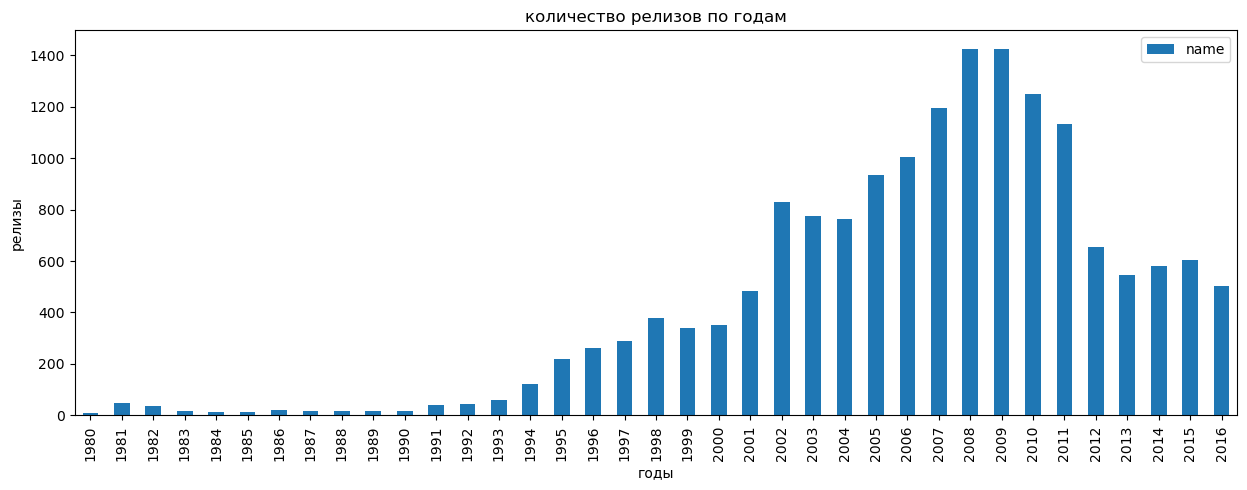

In [20]:
# анализируем количество релизов в разные годы
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(y='name', kind='bar', figsize=(15, 5))
plt.xlabel('годы')
plt.ylabel('релизы')
plt.title('количество релизов по годам')

Учитывая малое количество релизов до начала 90-х годов, данные за этот период имеют минимальную важность для исследования

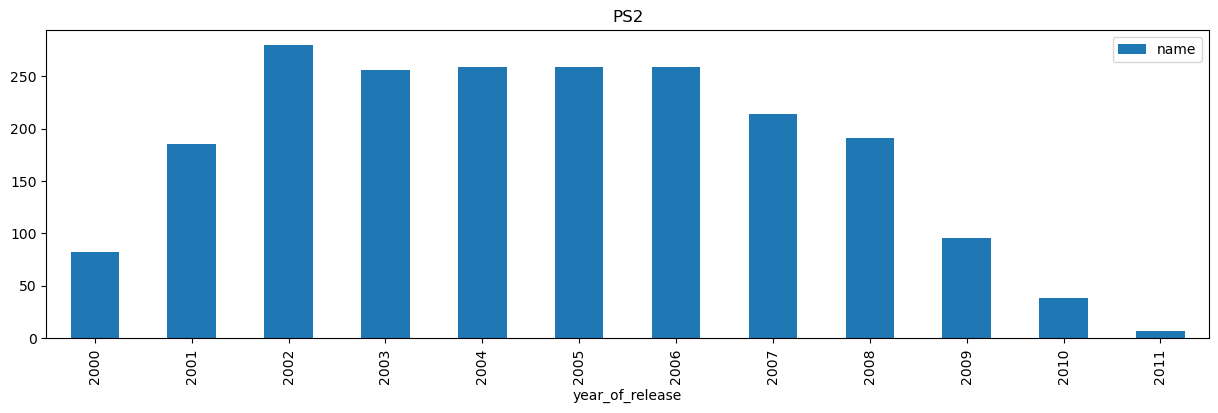

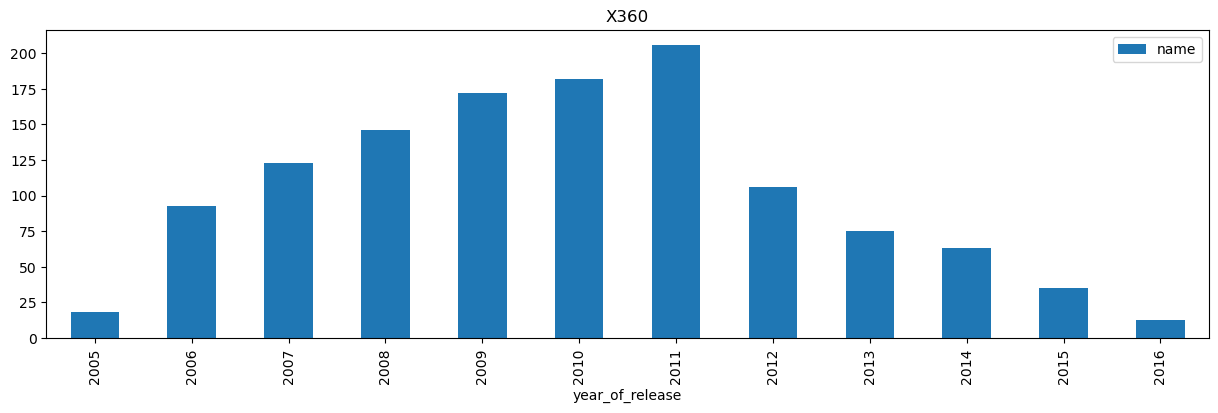

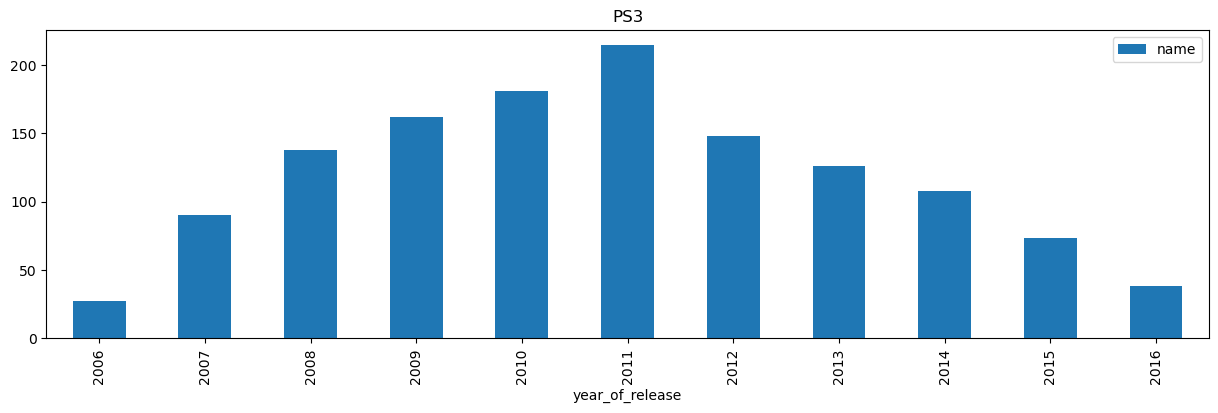

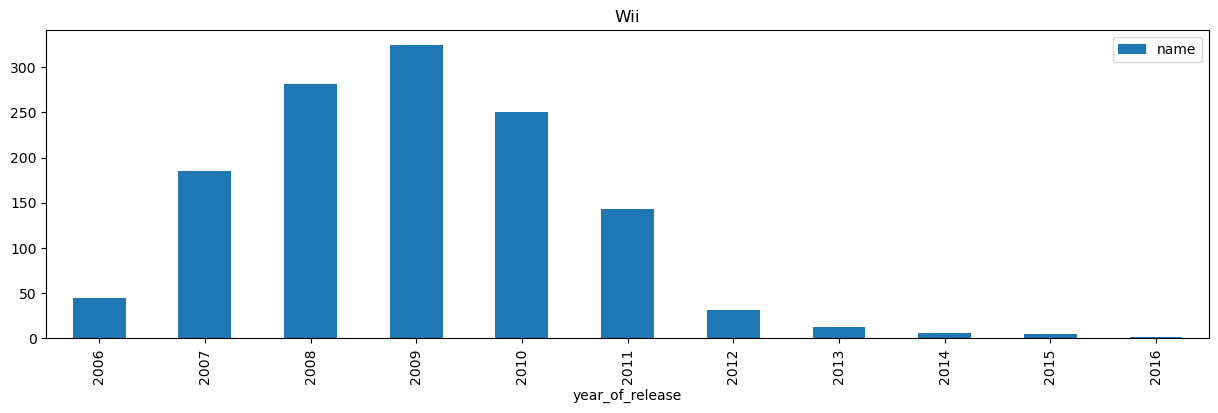

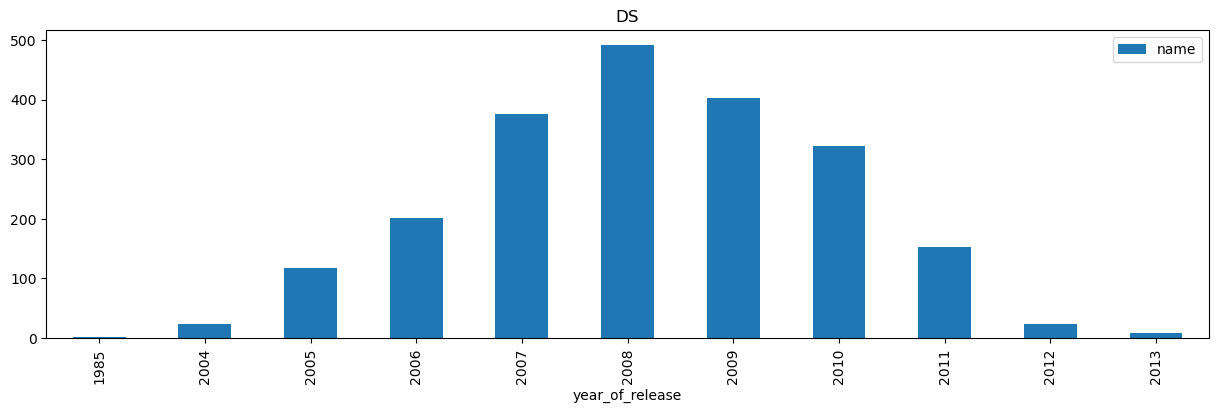

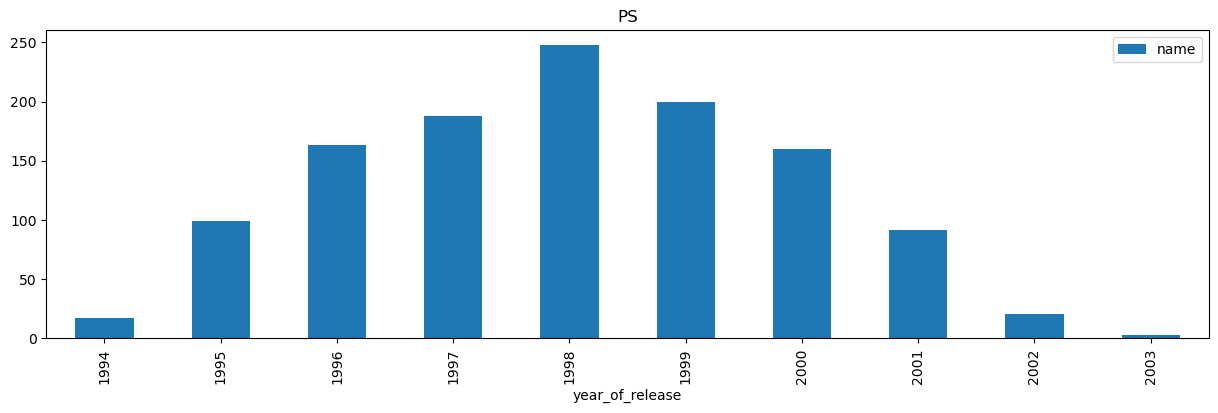

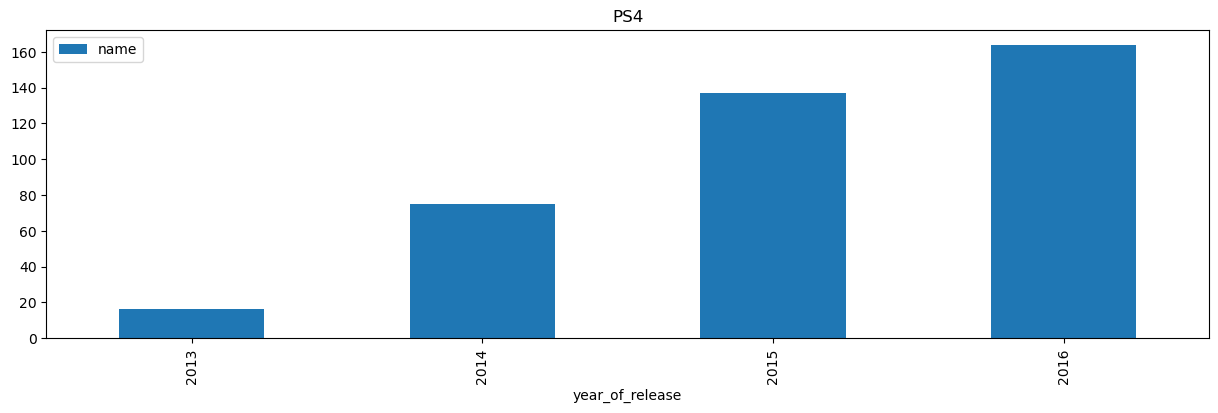

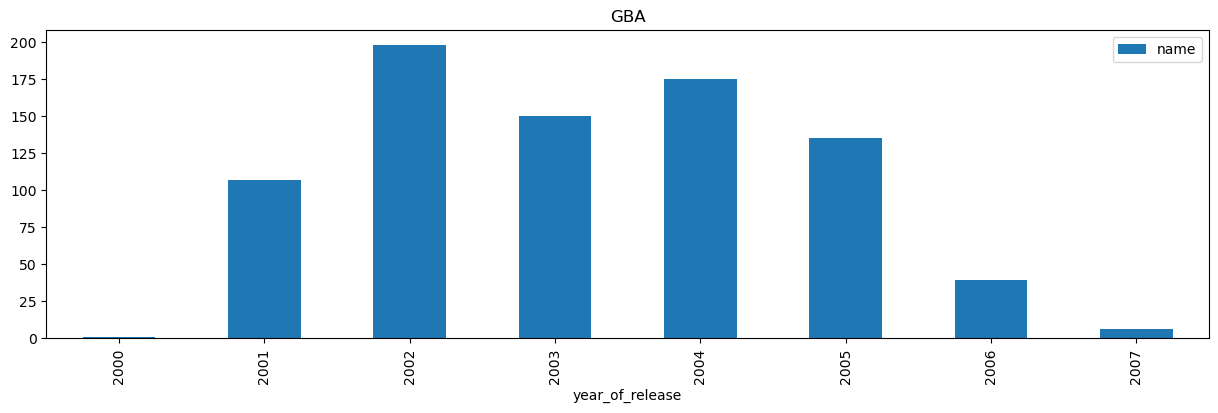

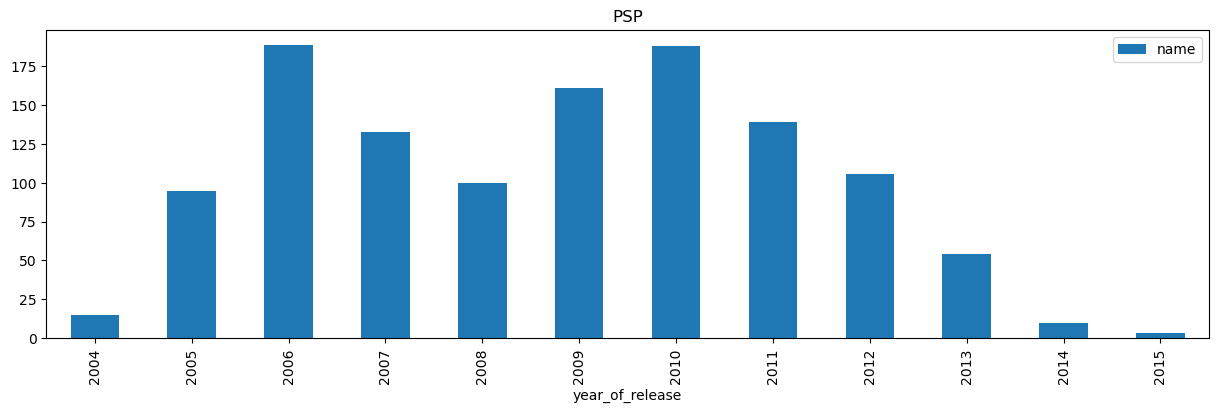

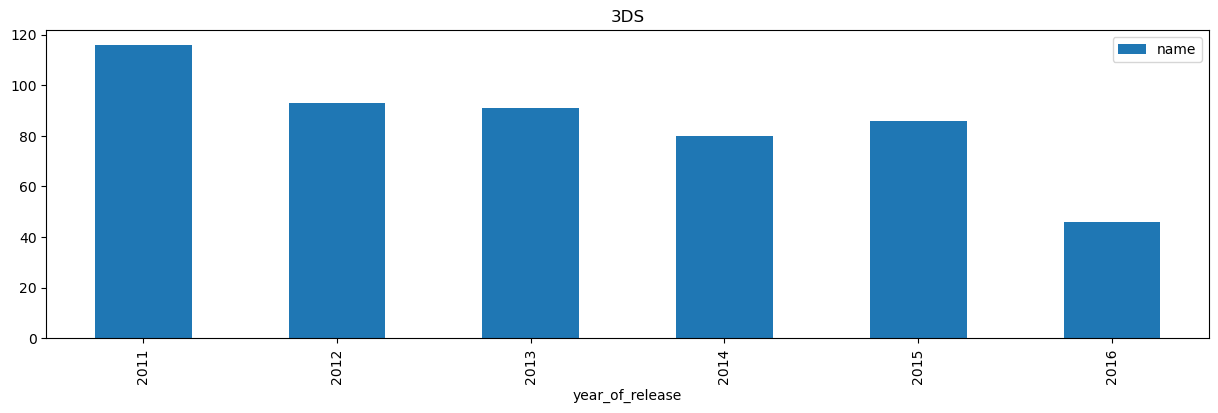

In [21]:
# смотрим, количество релизов для разных платформ взависимости от года

top_platforms = df['total_sales'].groupby(df['platform']).sum().sort_values(ascending=False).head(10)

#print(top_platforms.index)

for platform in top_platforms.index:
    df[df['platform'] == platform].pivot_table(
        index='year_of_release', values='name', aggfunc='count').plot(
        y='name', kind='bar', figsize=(15, 4), title=platform)

In [22]:
# консоль Nintendo DS была выпущена в 2004-м году, на графике видны релизы за 85-й. Удалим их

df = df.loc[(df['platform'] != 'DS') | (df['year_of_release'] != 1985)]

In [23]:
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [24]:
# жизненный срок платформы: среднее и медиана

print('Среднее', years_of_life['years_of_life'].mean())
print('Медиана', years_of_life['years_of_life'].median())

Среднее 7.0
Медиана 6.0


In [25]:
# выбираем перспективные платформы, имеющие релизы с 2014-го по 2016-й годы.

top_platforms = df.query('year_of_release > 2013').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
by='total_sales', ascending=False)
print(top_platforms)

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22
WiiU            42.98
PC              27.05
PSV             22.40
Wii              5.07
PSP              0.36


Исследование показывает, что платформа "живет" около семи лет (не учитывая ПК). За актуальный период принимаем 3 года с 2014-го по 2016-й. К 2014-му году "погиб" ряд платформ, они не будут представлять интереса для прогноза. Так же за это время наблюдался рост продаж у PS4 и Xbox one, у ПК продажи стабильны на длительном периоде. К 16-му году заметна общая тенденция к снижению продаж. Платформы, наиболее важные для исследования, сохранены в top_platforms.

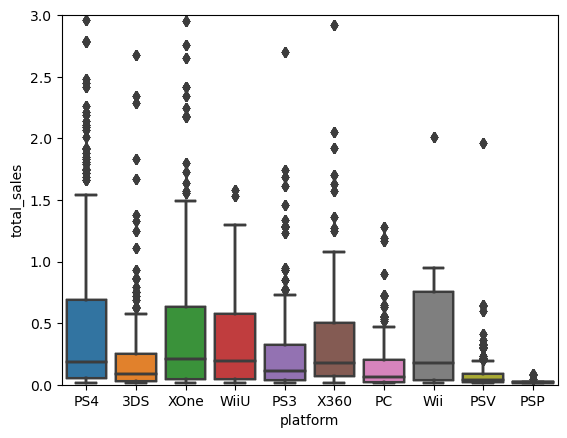

In [26]:
# строим boxplot для наиболее перспективных платформ

actual_period_df = df.query('year_of_release > 2013')

top_platforms_df = actual_period_df.query('platform in @top_platforms.index')

for x in top_platforms_df:
    sbn.boxplot()
    x = top_platforms_df['platform']
    y = top_platforms_df['total_sales']
    ax = sbn.boxplot(x, y, data=top_platforms_df)
    ax.set_ylim([0,3])
    plt.rcParams['figure.figsize']=(20,30)
plt.show()

На диаграммах размаха видно, что лидерами по глобальным продажам за актуальный период являются PS4, Xbox One и Nintendo WiiU. Графики PS4 и Xbox One схожи, медианные значения и области нормальных значений примерно равны. Параметры Nintendo WiiU немного отстают. Многочисленый выбросы у PS4, Xbox One иллюстрируют большее количество суперуспешных релизов, чем у других платформ. ПК при своей стабильности показывает существенно меньшее пространство нормальных значений, чем большинство платформ.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

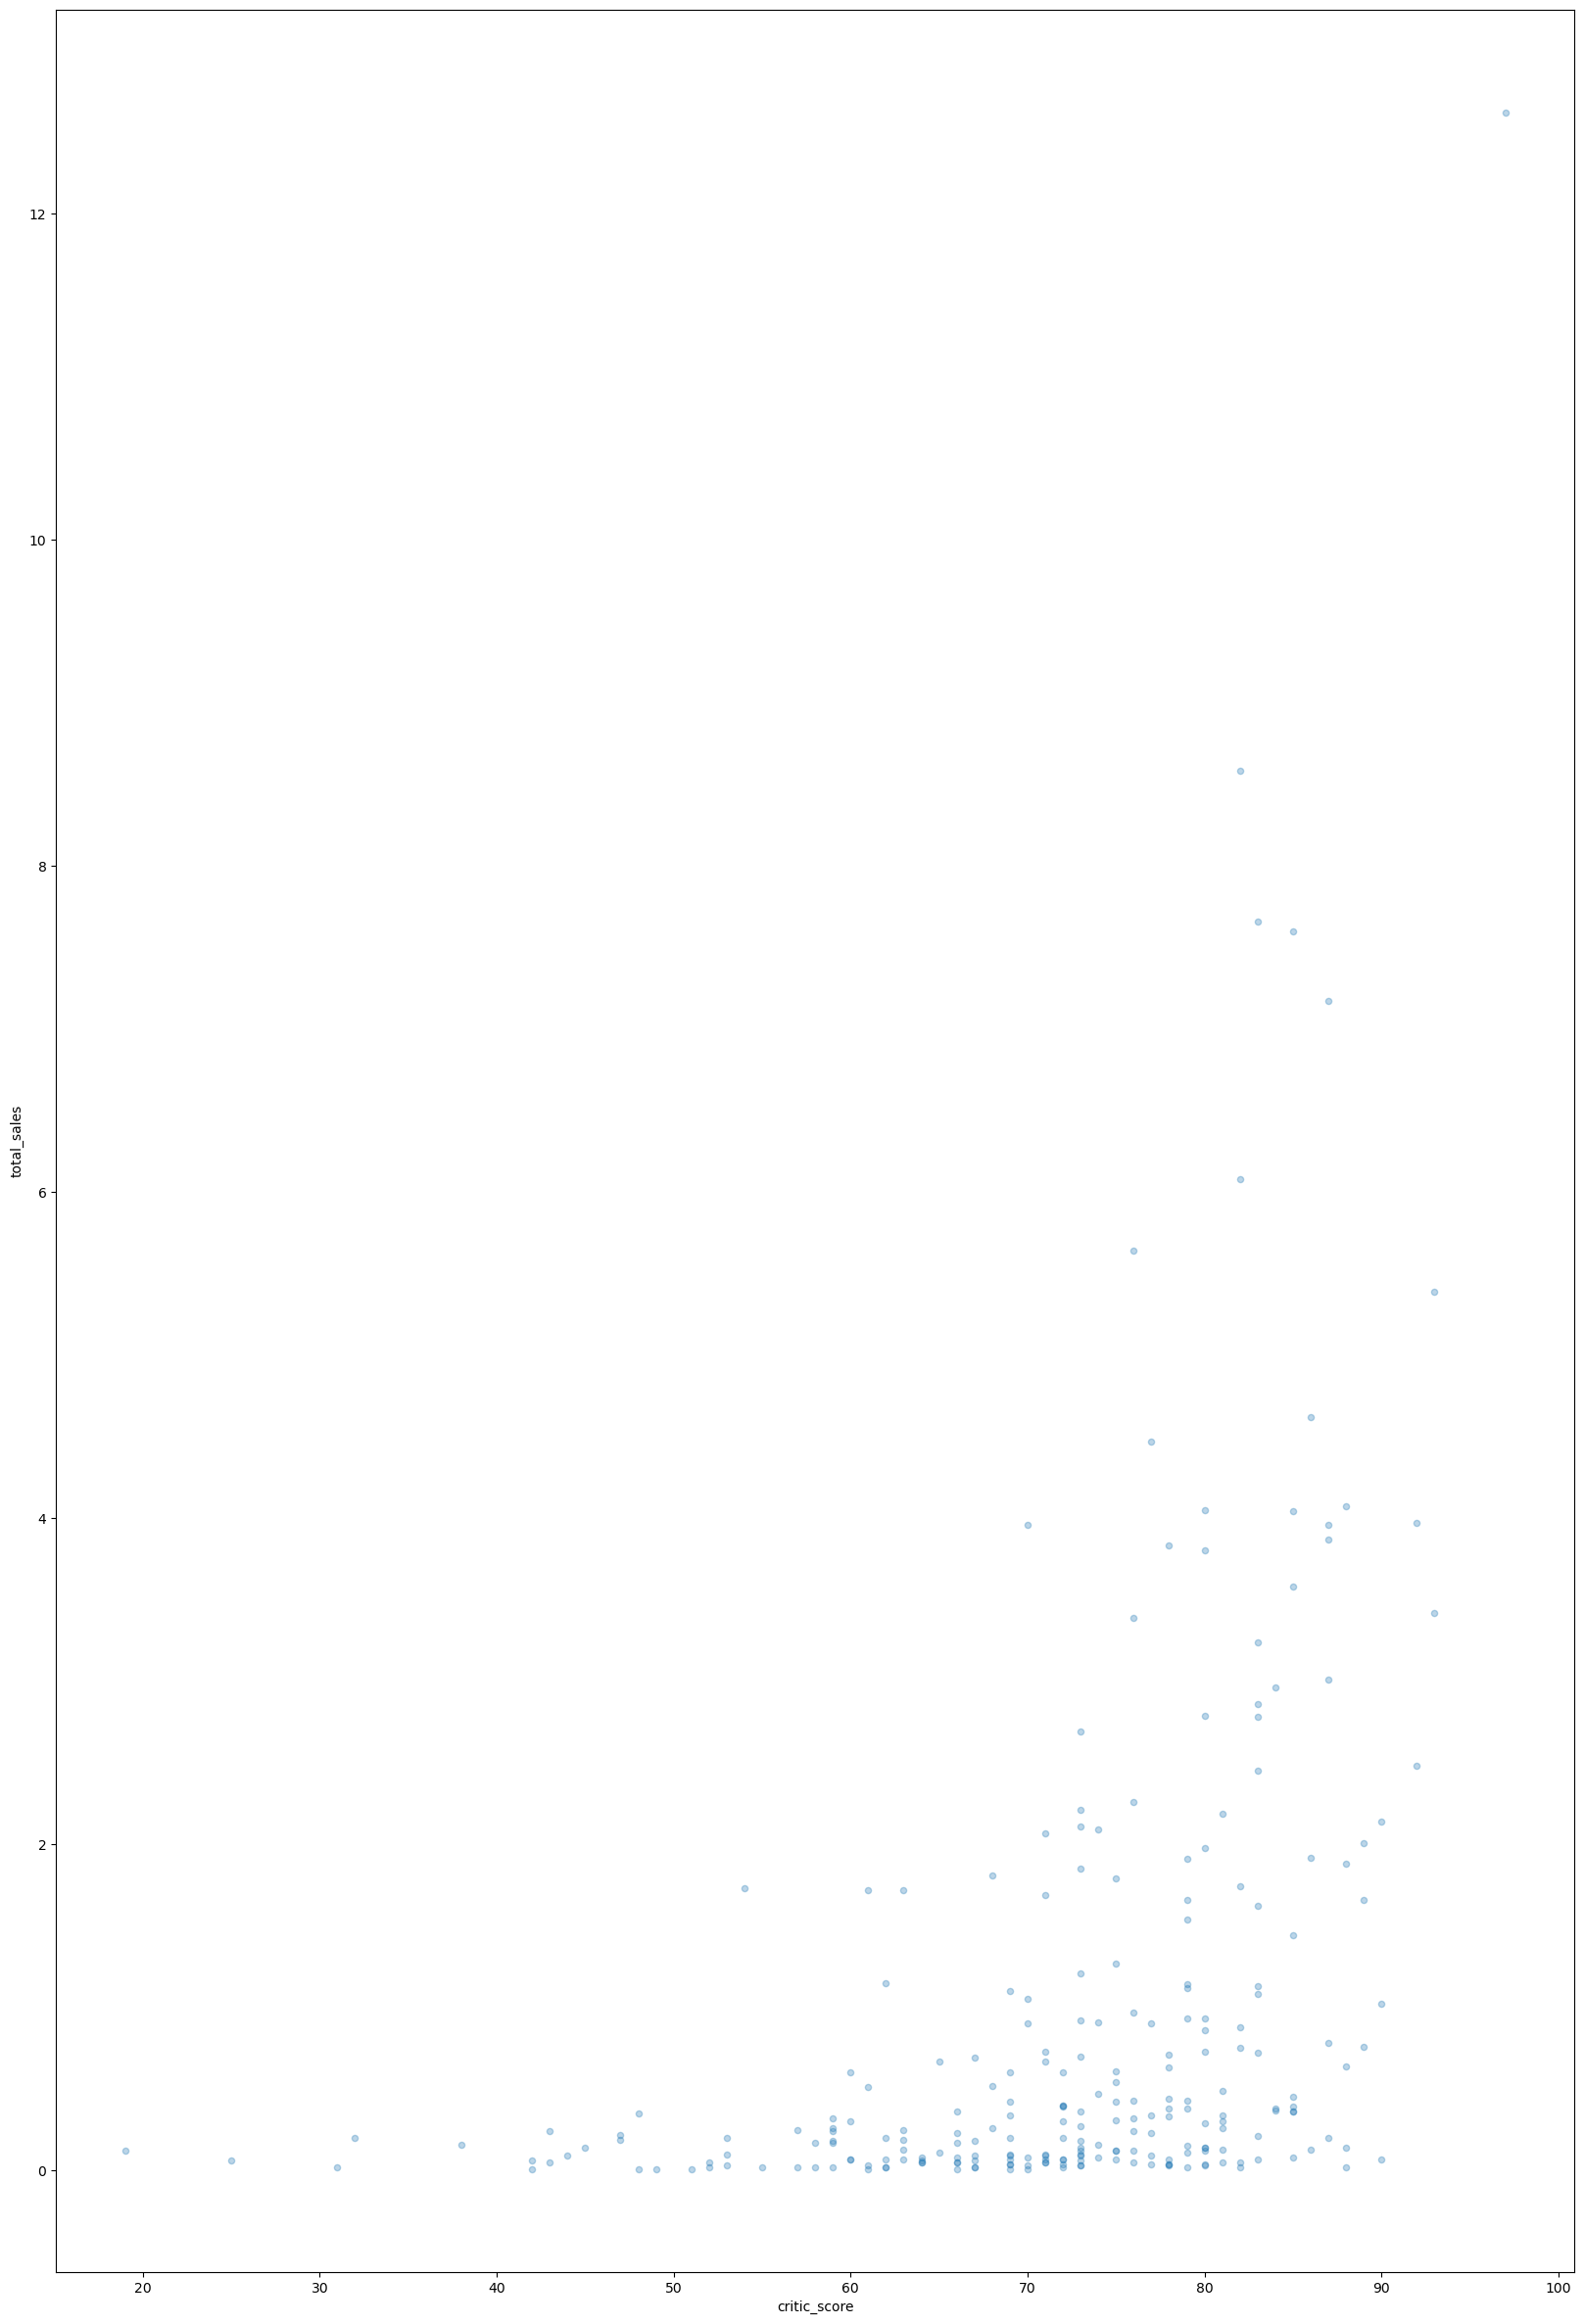

In [27]:
# выясняем зависимость между продажами и оцнками пользователей и критиков для PS4
# построим диаграммы рассеяния

df.loc[(df['platform'] == 'PS4')].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

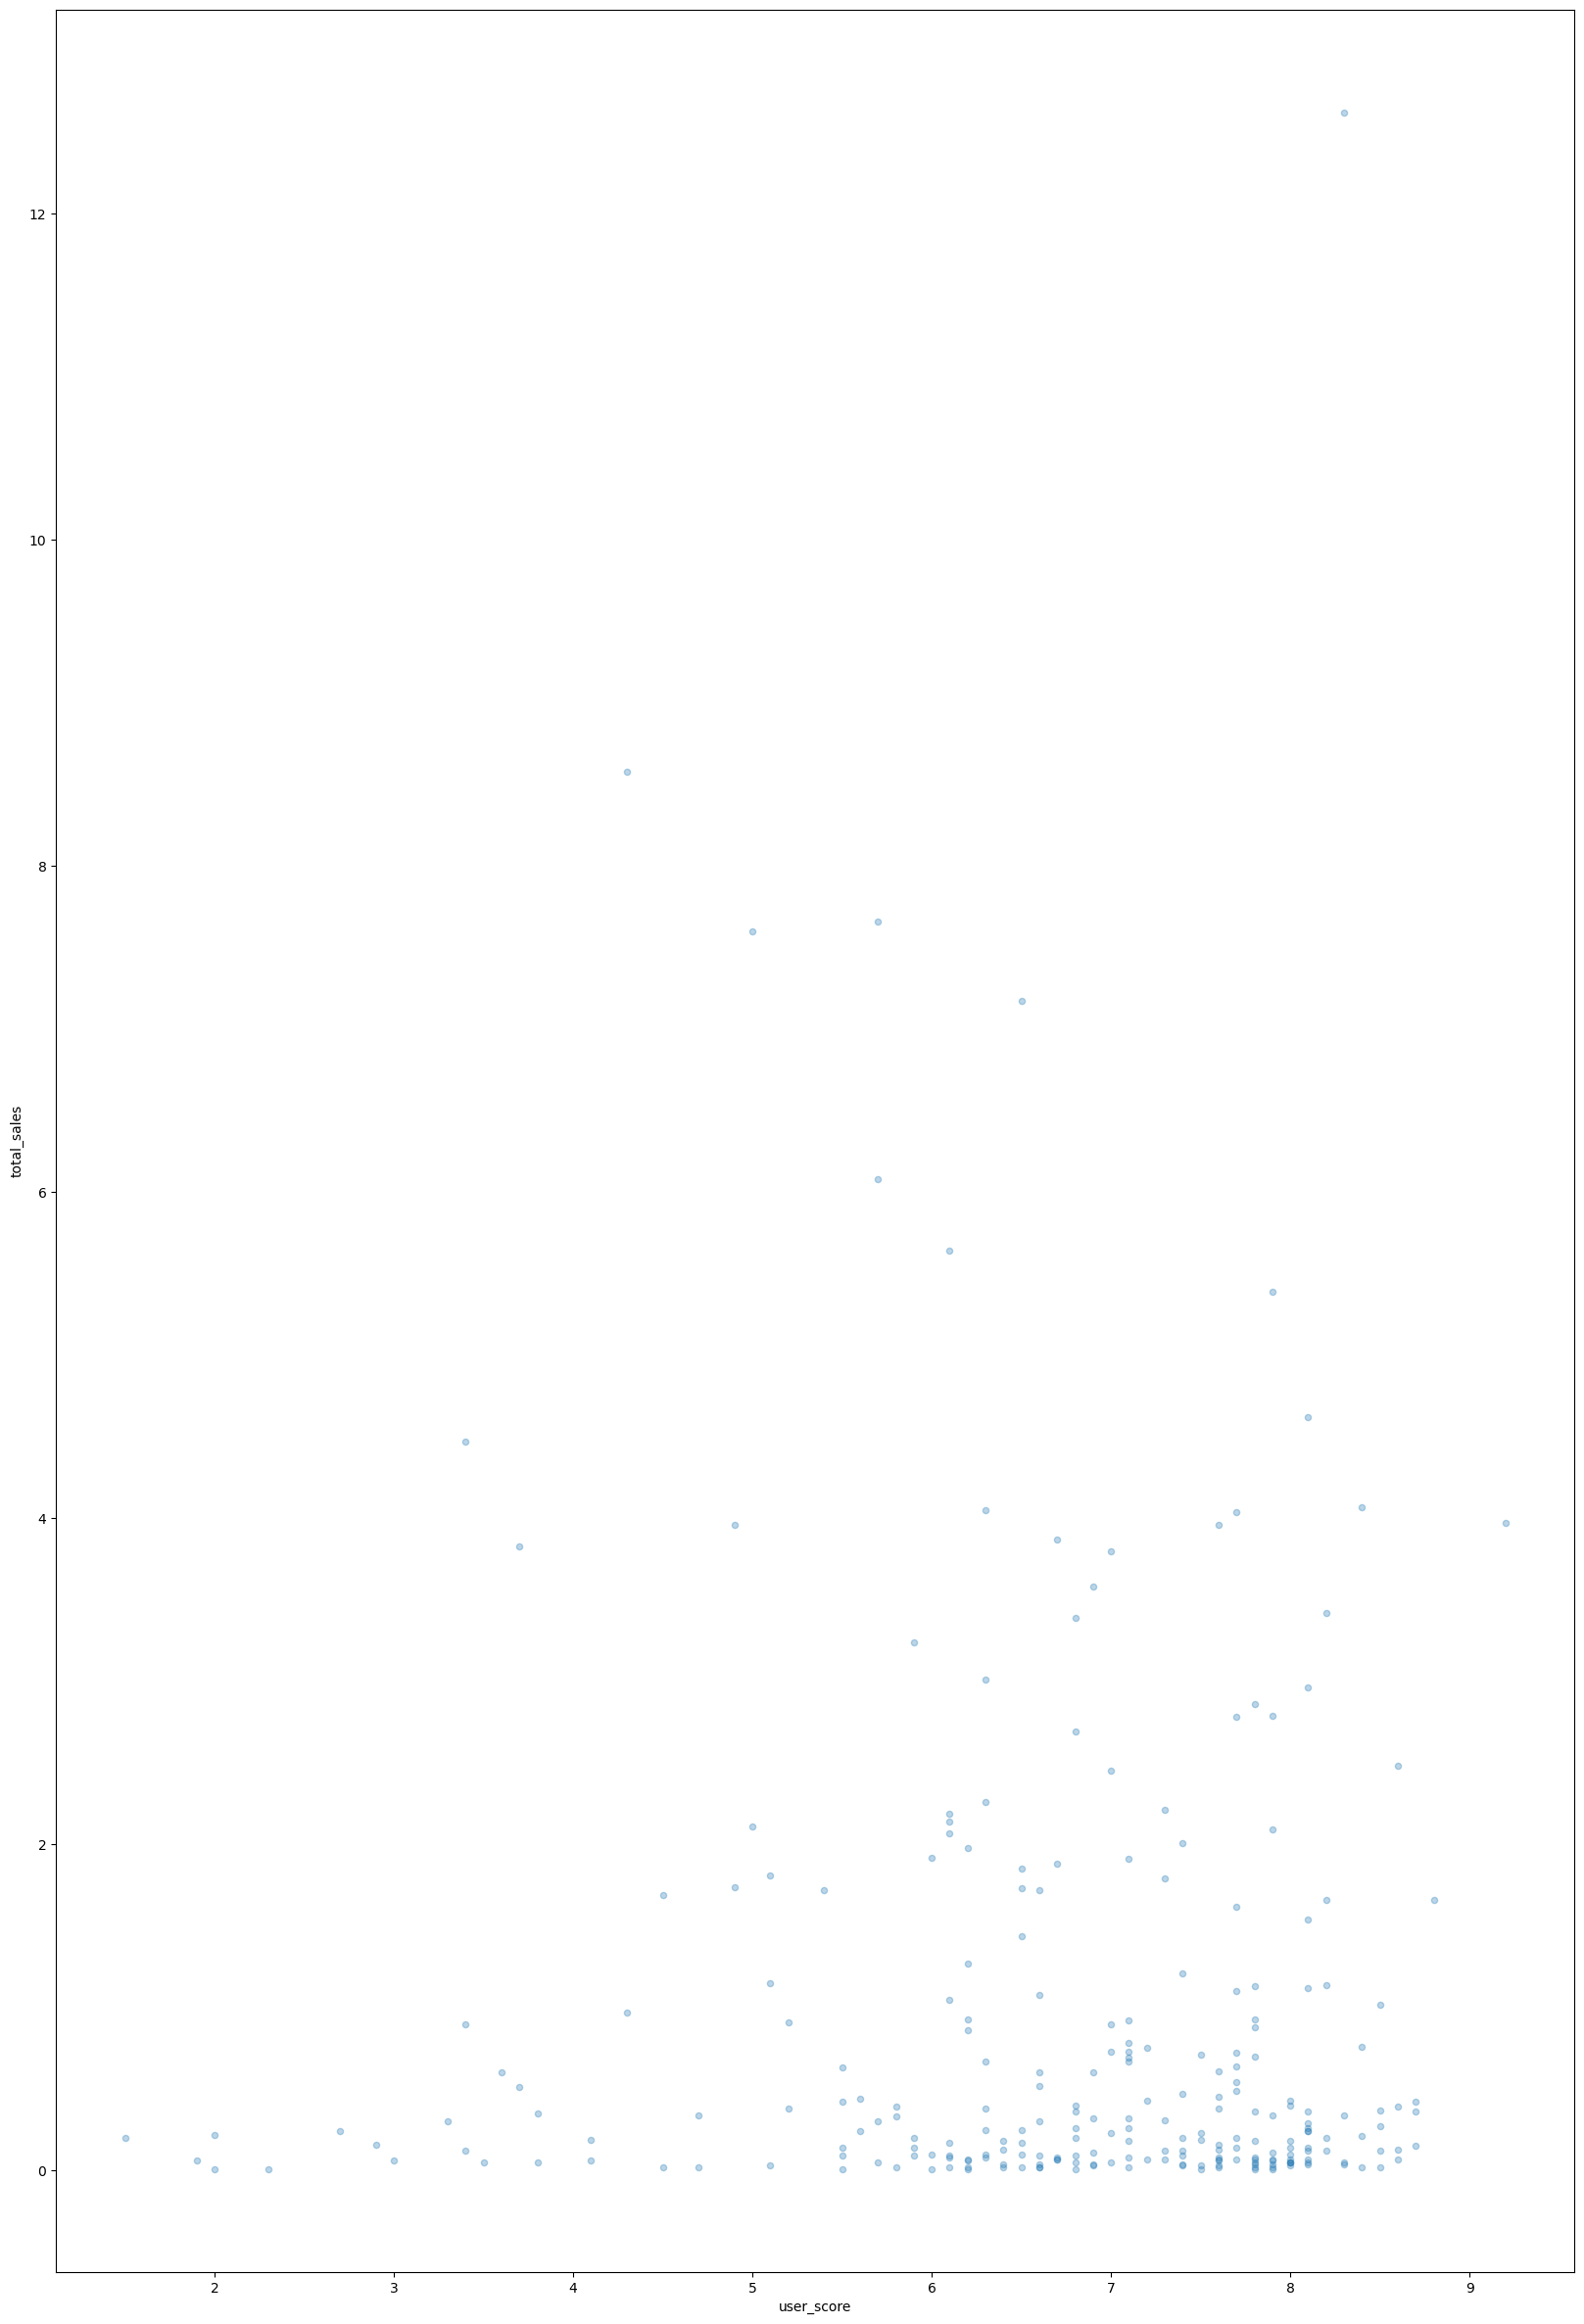

In [28]:
df.loc[(df['platform'] == 'PS4')].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

In [29]:
# находим кореляции для PS4

print('Зависимость продаж от оценок критиков', df[(df['platform'] == 'PS4')]['critic_score'].corr(df['total_sales']).round(2))

Зависимость продаж от оценок критиков 0.41


In [30]:
print('Зависимость продаж от оценок игроков', df[(df['platform'] == 'PS4')]['user_score'].corr(df['total_sales']).round(2))

Зависимость продаж от оценок игроков -0.03


Для PS4 глобальные продажи положительно коррелируют с оценками критиков и имеют принебрежительно маленькую корреляцию с оценками игроков.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

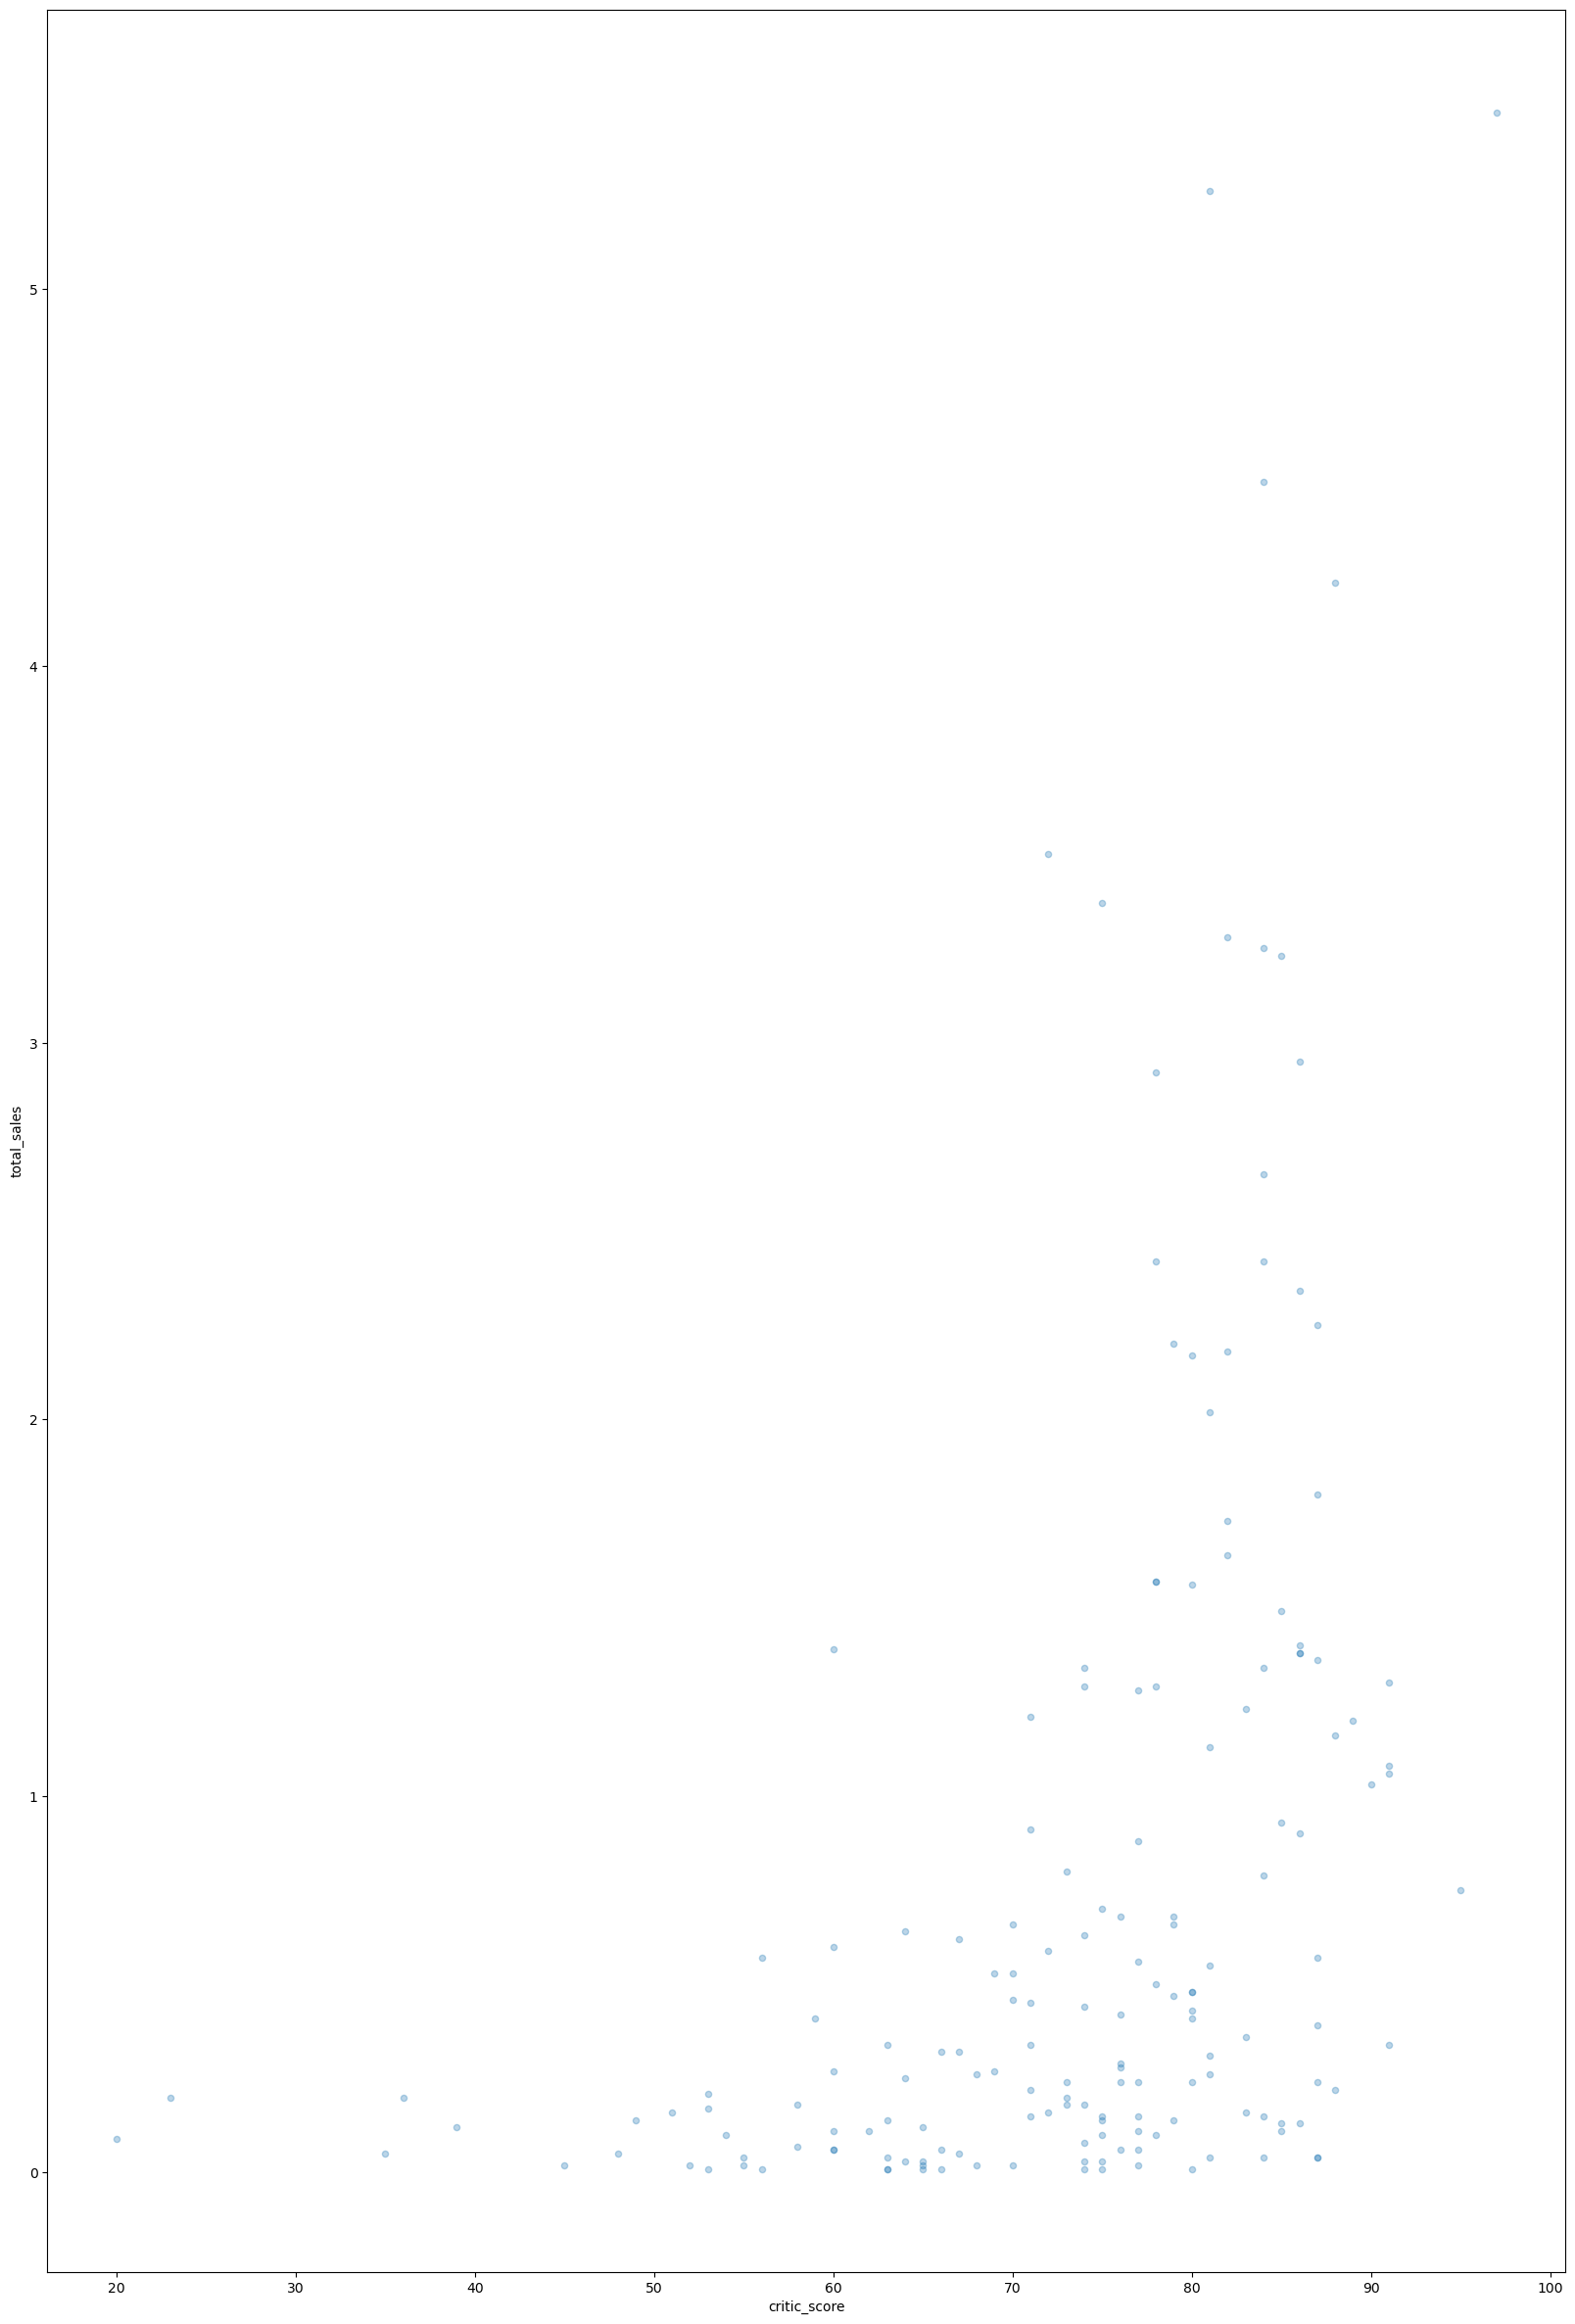

In [31]:
# выясняем зависимость между продажами и оцнками пользователей и критиков для Xbox One
# построим диаграммы рассеяния

df.loc[(df['platform'] == 'XOne')].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

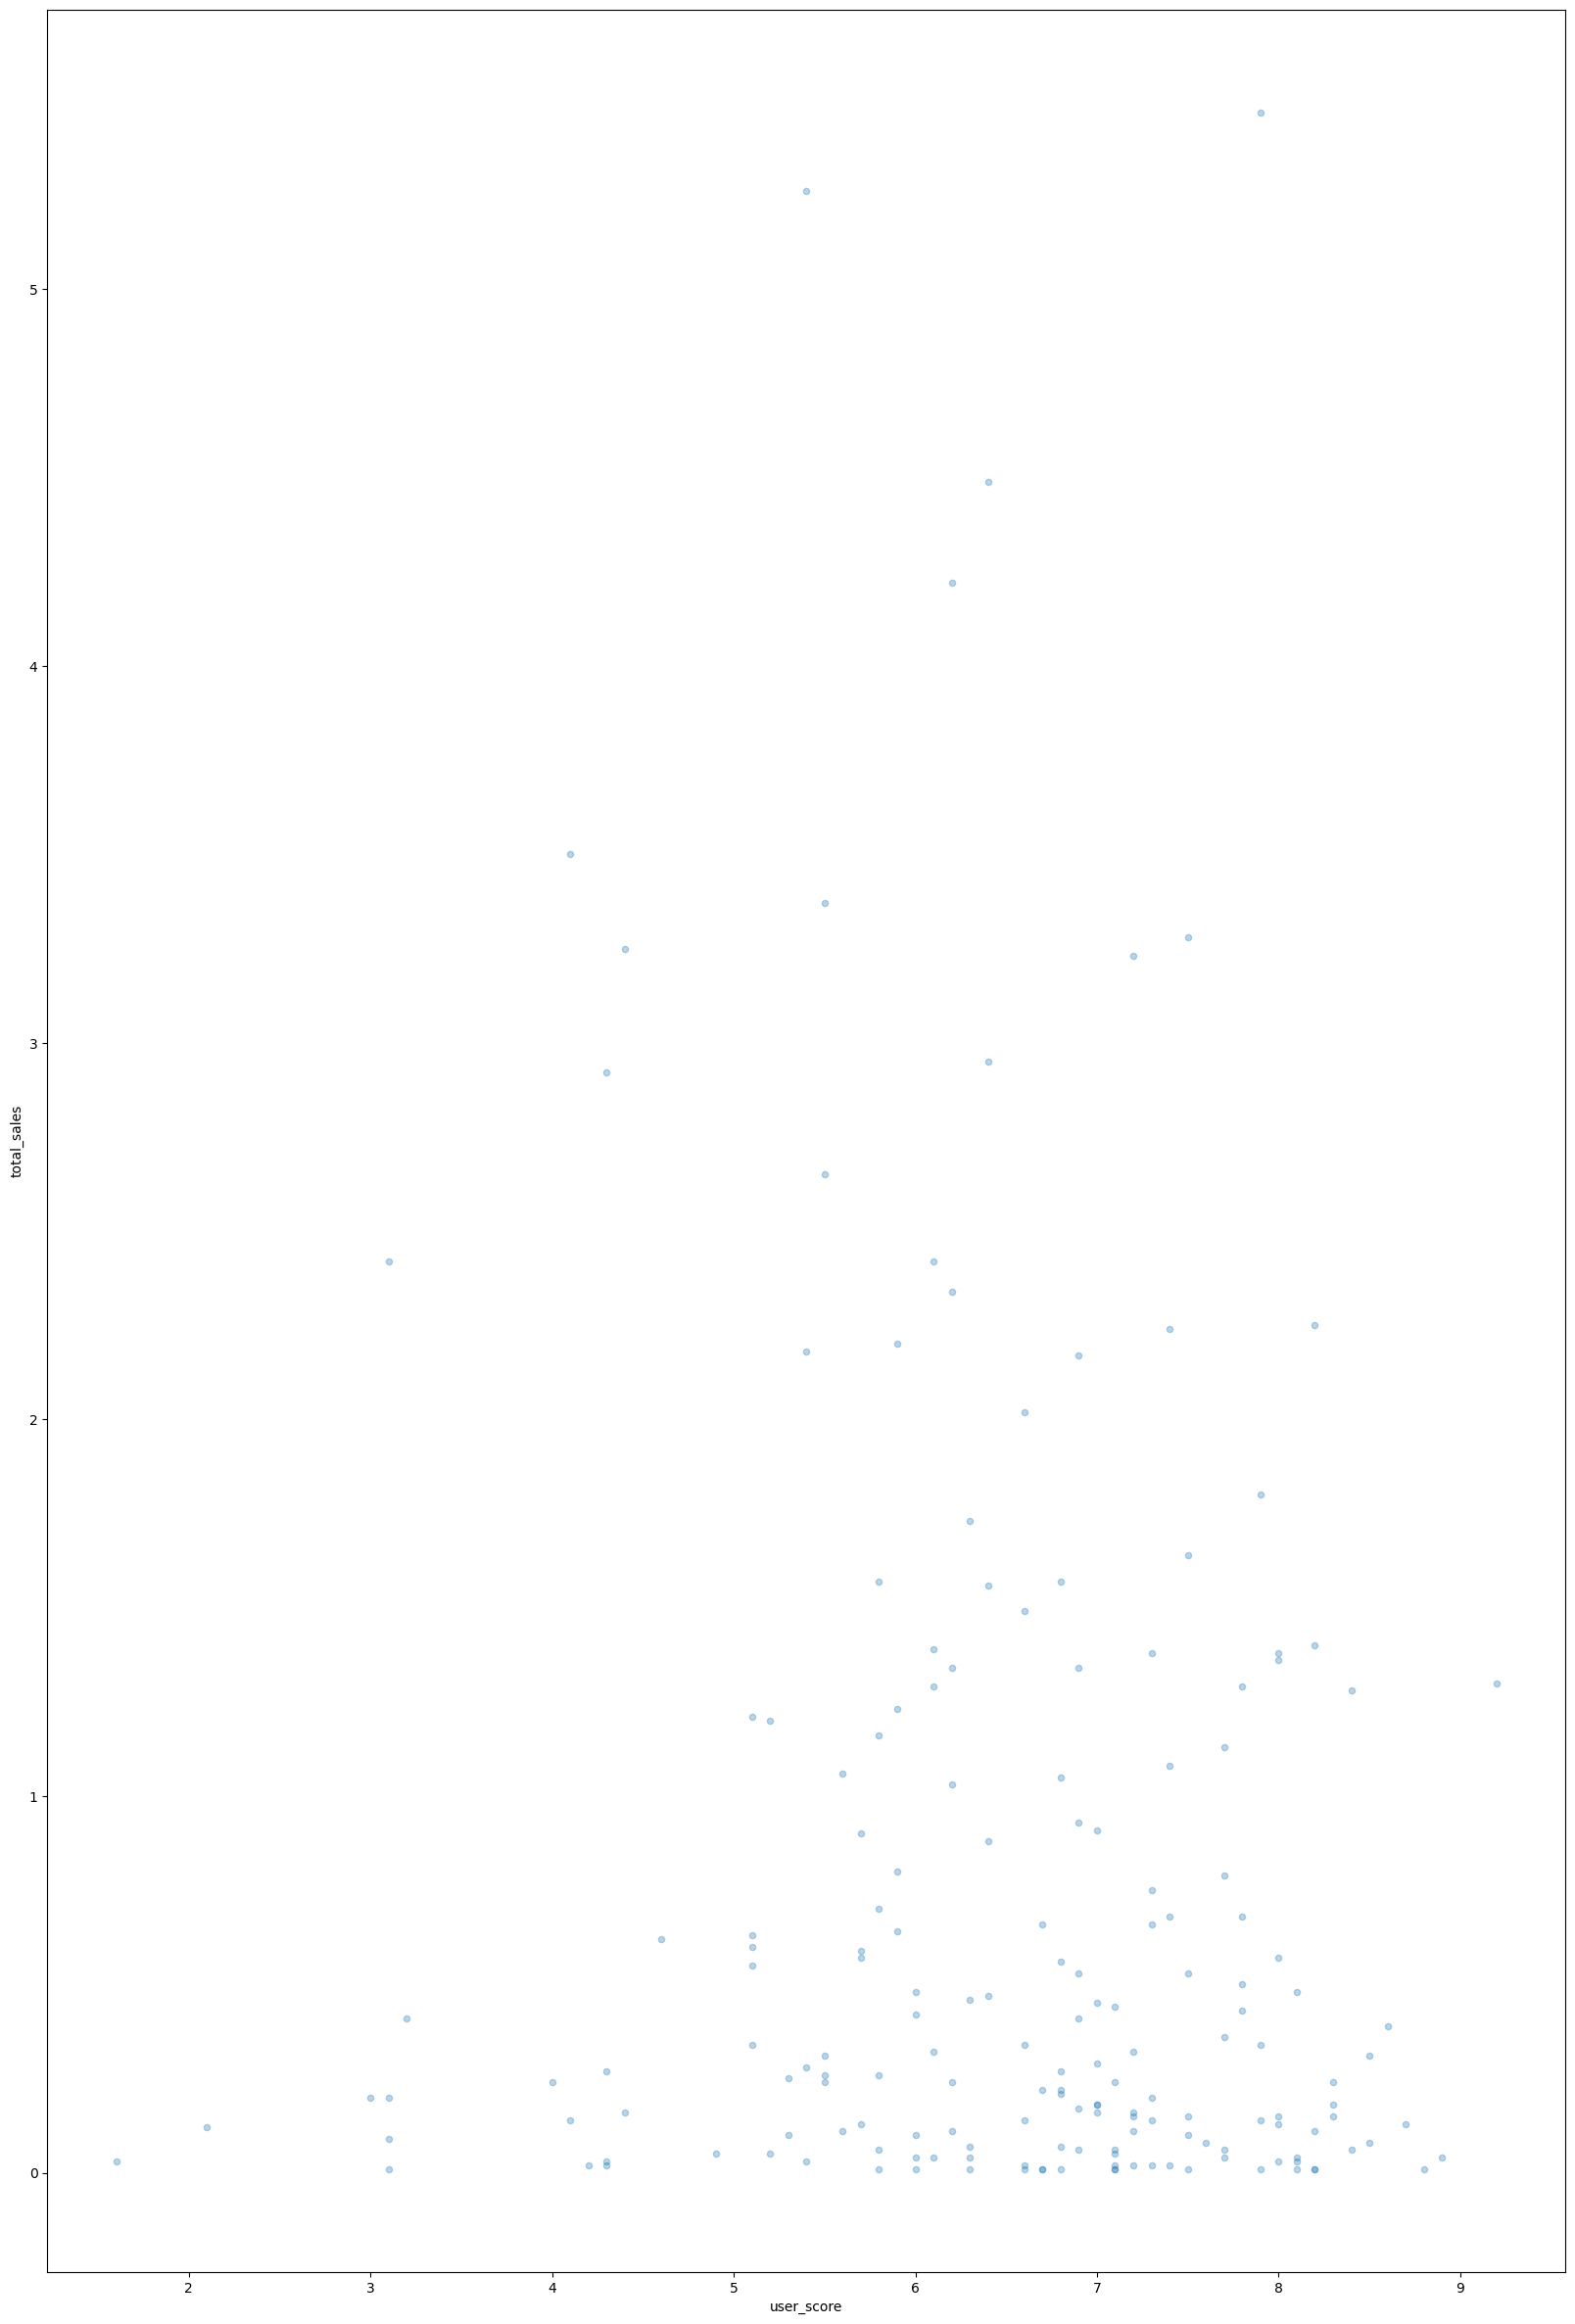

In [32]:
df.loc[(df['platform'] == 'XOne')].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

In [33]:
# находим кореляции для Xbox One

print('Зависимость продаж от оценок критиков', df[(df['platform'] == 'XOne')]['critic_score'].corr(df['total_sales']).round(2))

Зависимость продаж от оценок критиков 0.42


In [34]:
print('Зависимость продаж от оценок игроков', df[(df['platform'] == 'XOne')]['user_score'].corr(df['total_sales']).round(2))

Зависимость продаж от оценок игроков -0.07


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

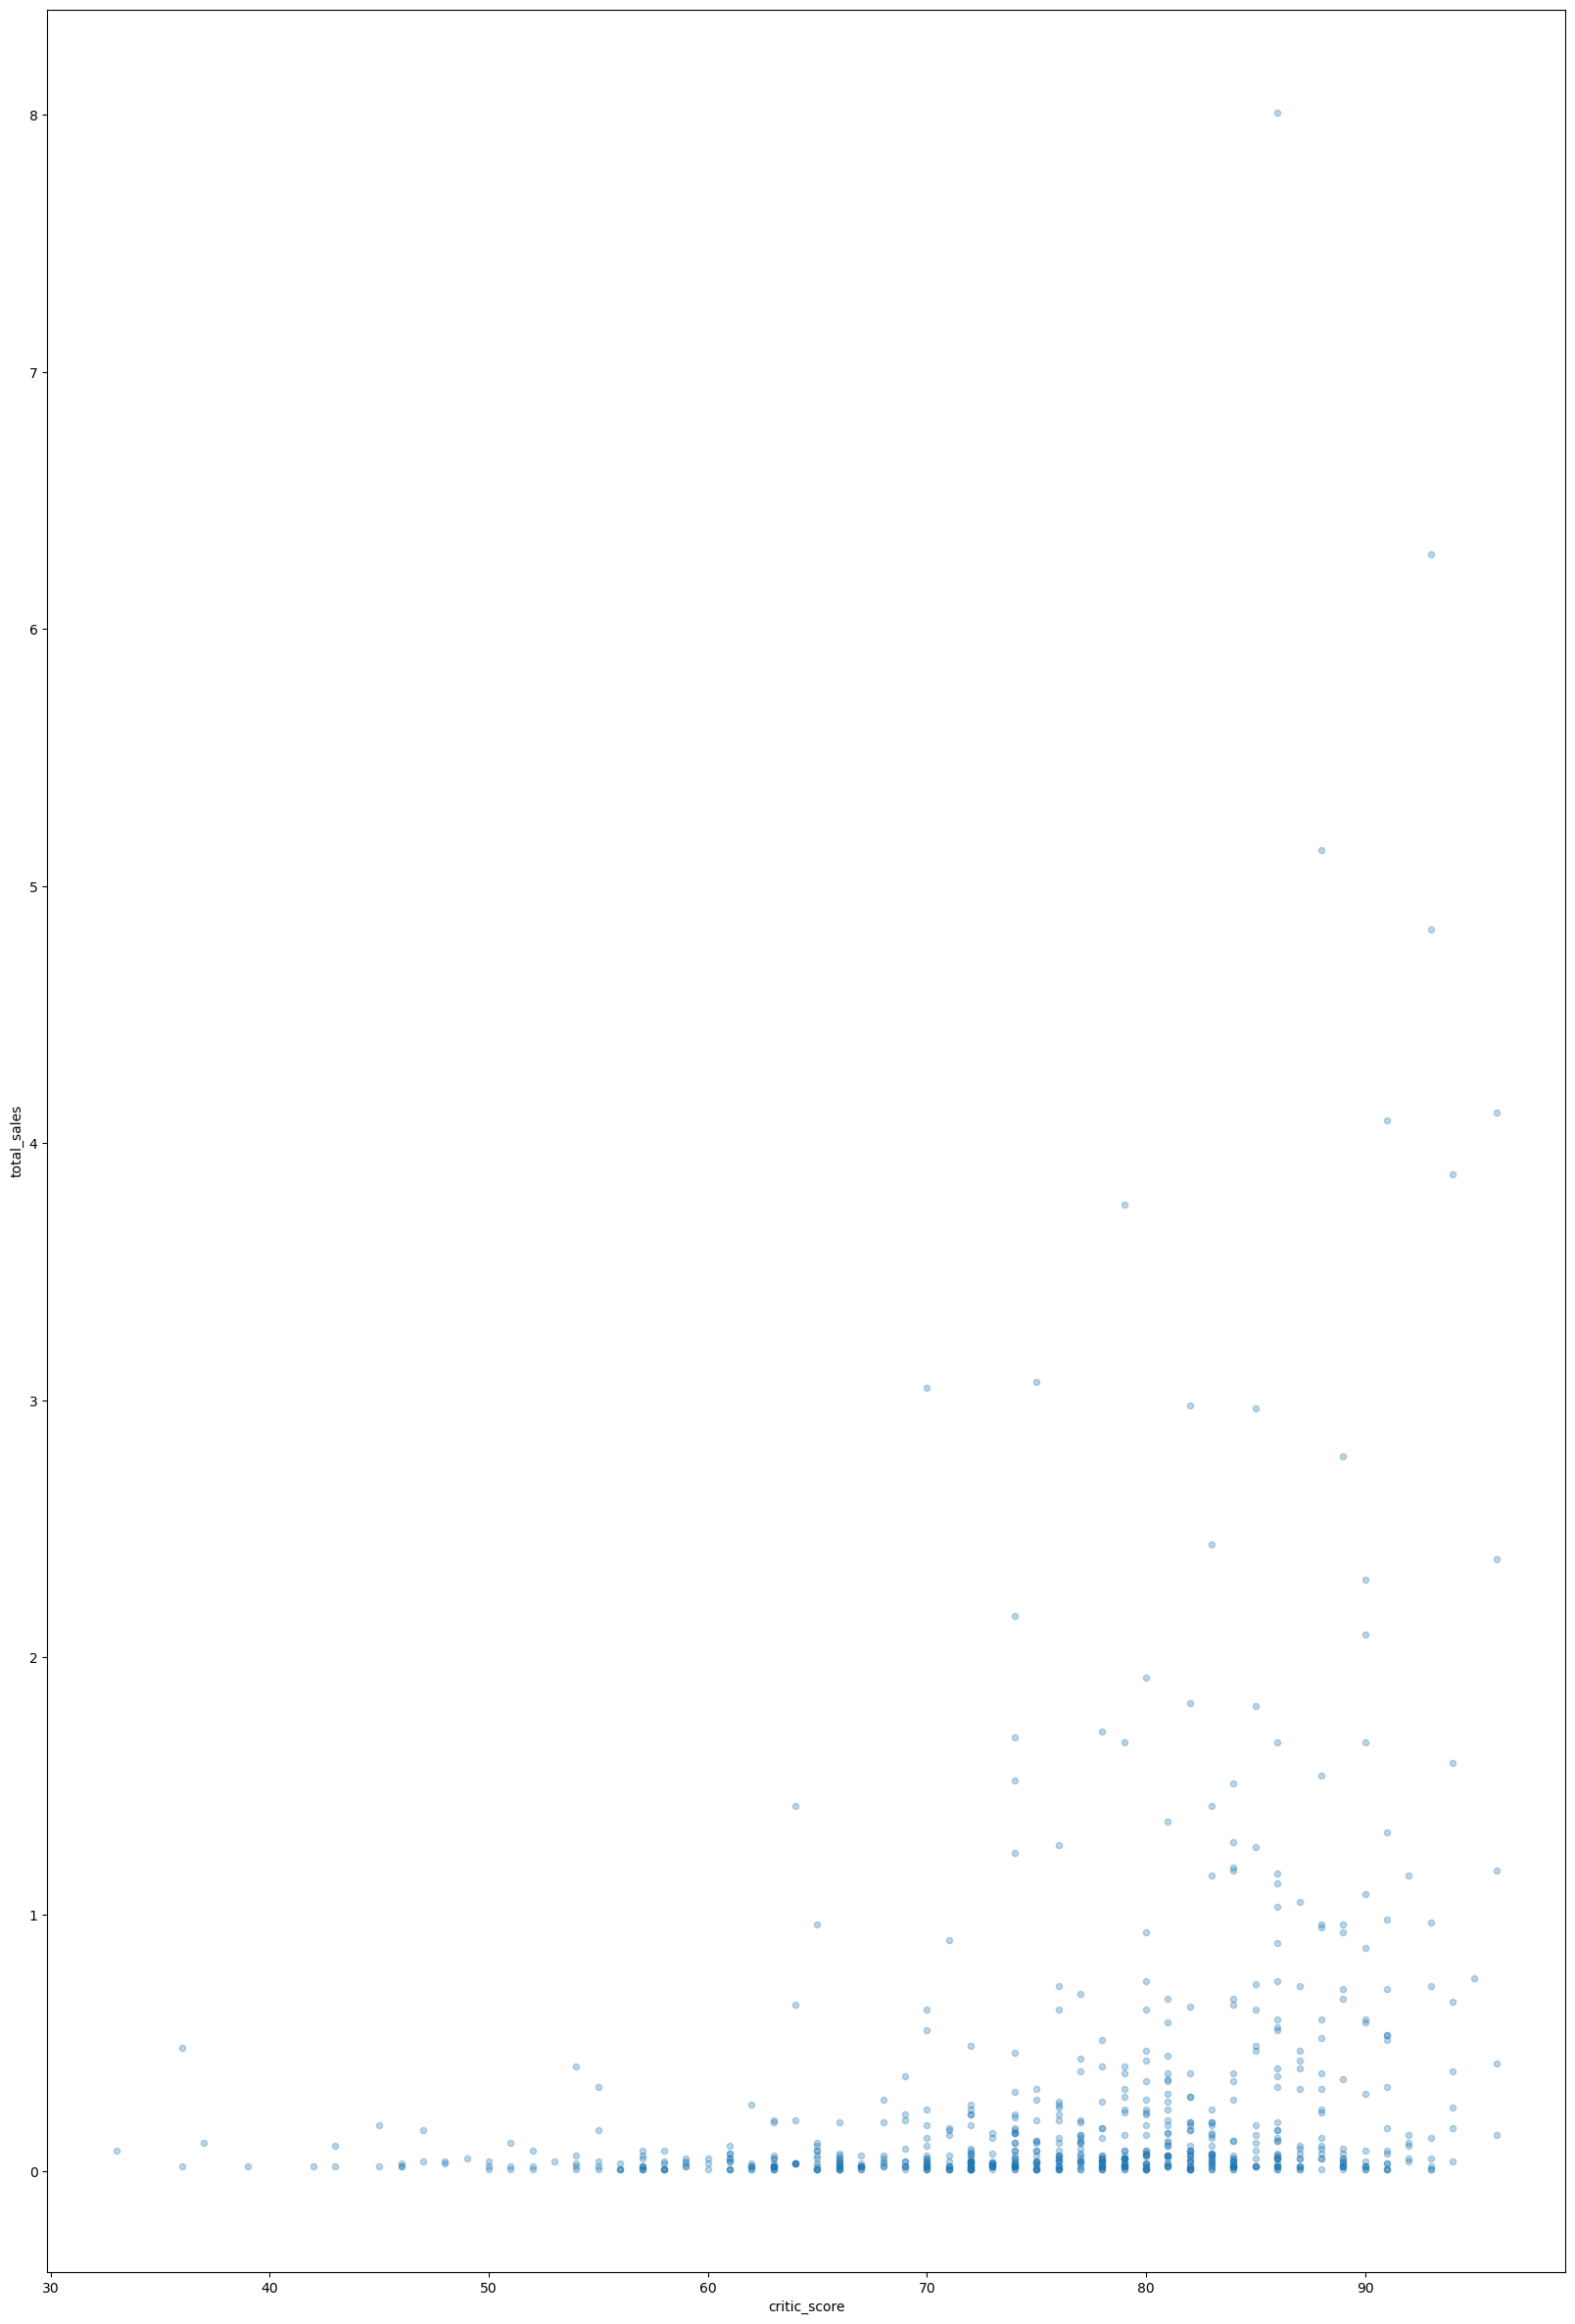

In [35]:
# выясняем зависимость между продажами и оцнками пользователей и критиков для ПК
# построим диаграммы рассеяния

df.loc[(df['platform'] == 'PC')].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

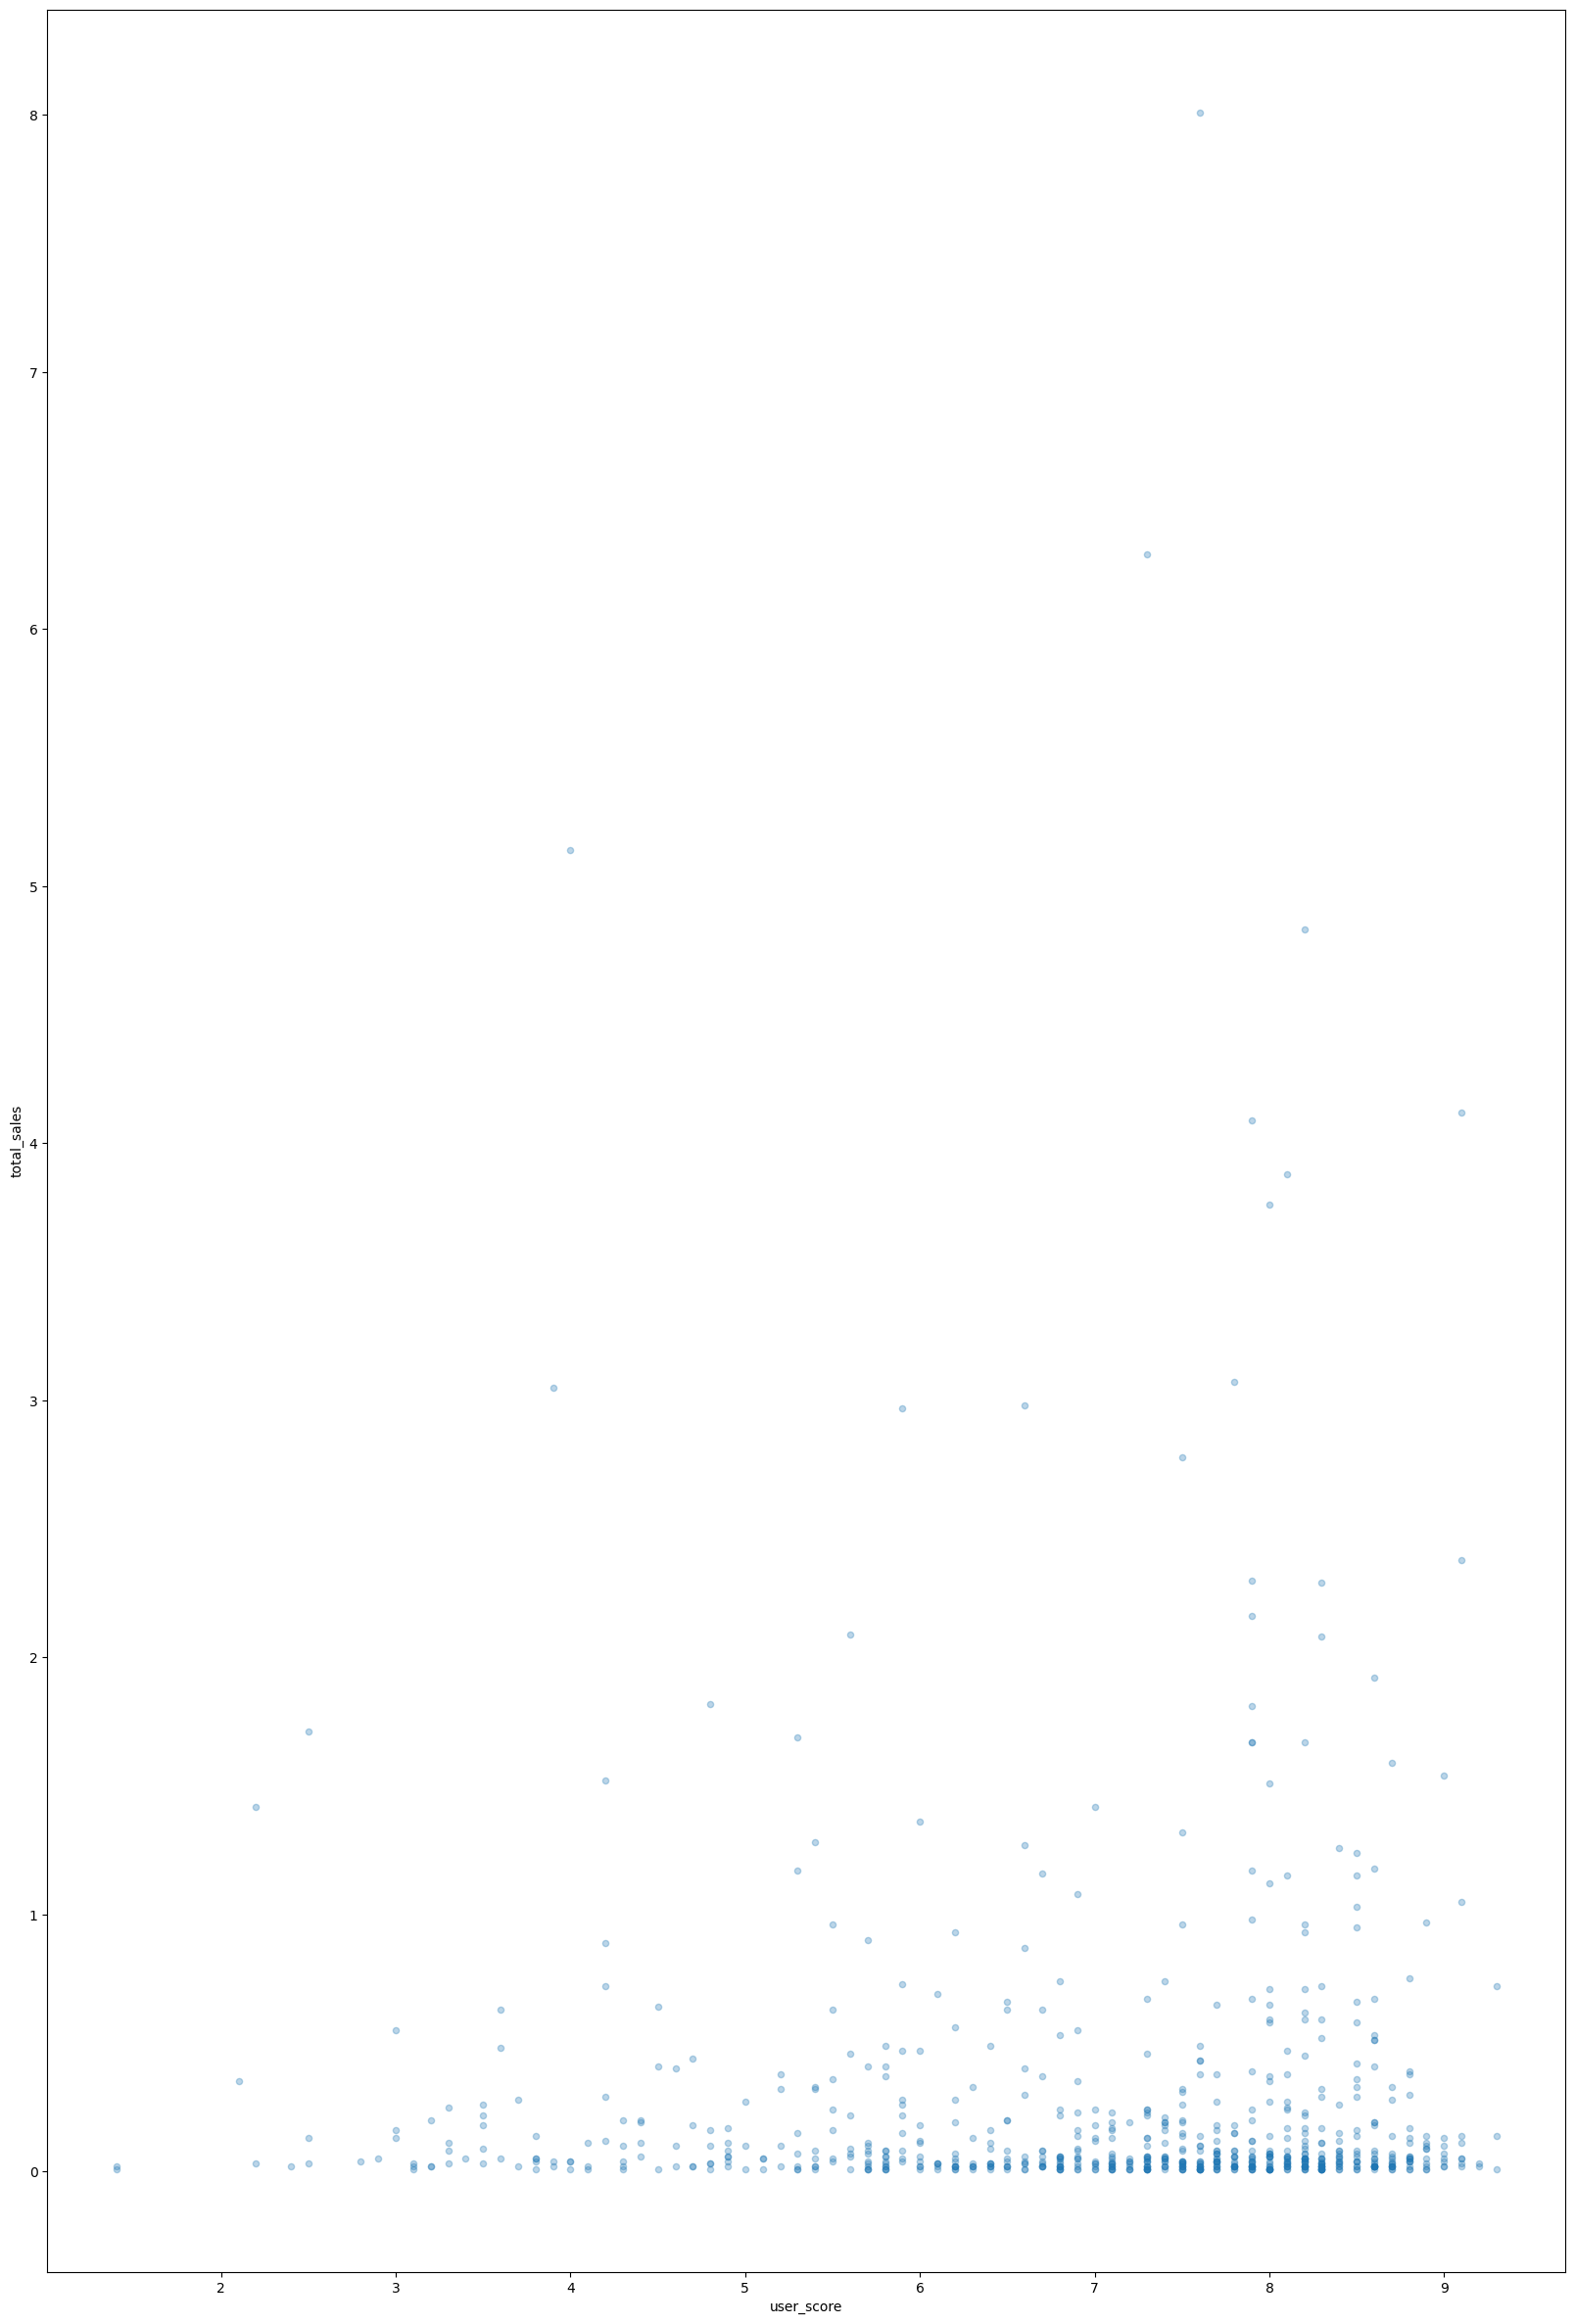

In [36]:
df.loc[(df['platform'] == 'PC')].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

In [37]:
# находим кореляции для ПК

print('Зависимость продаж от оценок критиков', df[(df['platform'] == 'PC')]['critic_score'].corr(df['total_sales']).round(2))

Зависимость продаж от оценок критиков 0.26


In [38]:
print('Зависимость продаж от оценок игроков', df[(df['platform'] == 'PC')]['user_score'].corr(df['total_sales']).round(2))

Зависимость продаж от оценок игроков 0.01


Для Xbox One характерны такие же зависимости глобальных продаж от оценок критиков и пользователей, как у PS4. Наблюдается положительная корреляция с оценками критиков, не зависят от оценок пользователей. Ситуация с ПК отличается: здесь даже зависимость от рейтинга критиков незначительна.

<AxesSubplot:title={'center':'genre sales'}, xlabel='genre'>

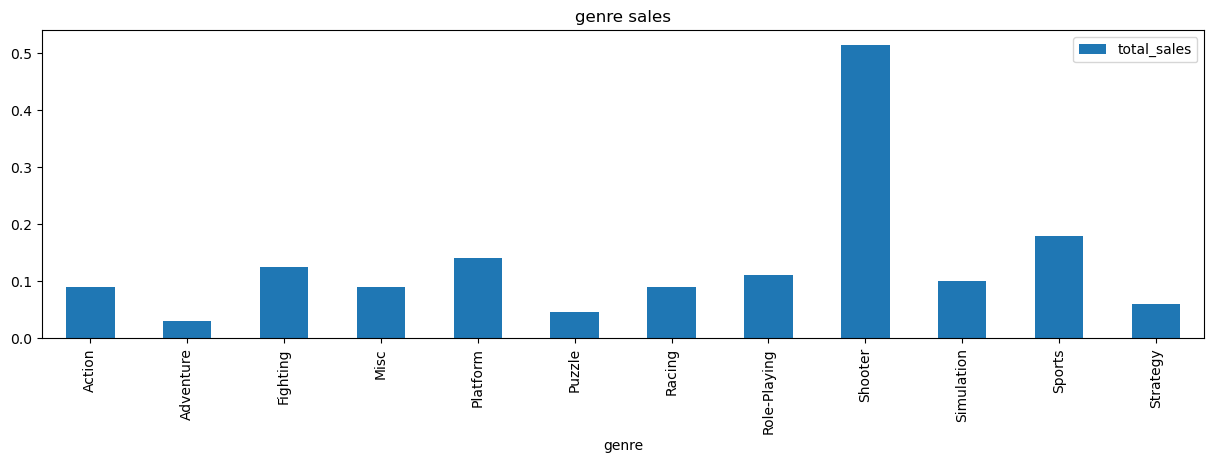

In [39]:
# изучаем распределение продаж по жанрам с помощью гистограммы

actual_period_df.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(
y='total_sales', kind='bar', figsize=(15, 4), title='genre sales')

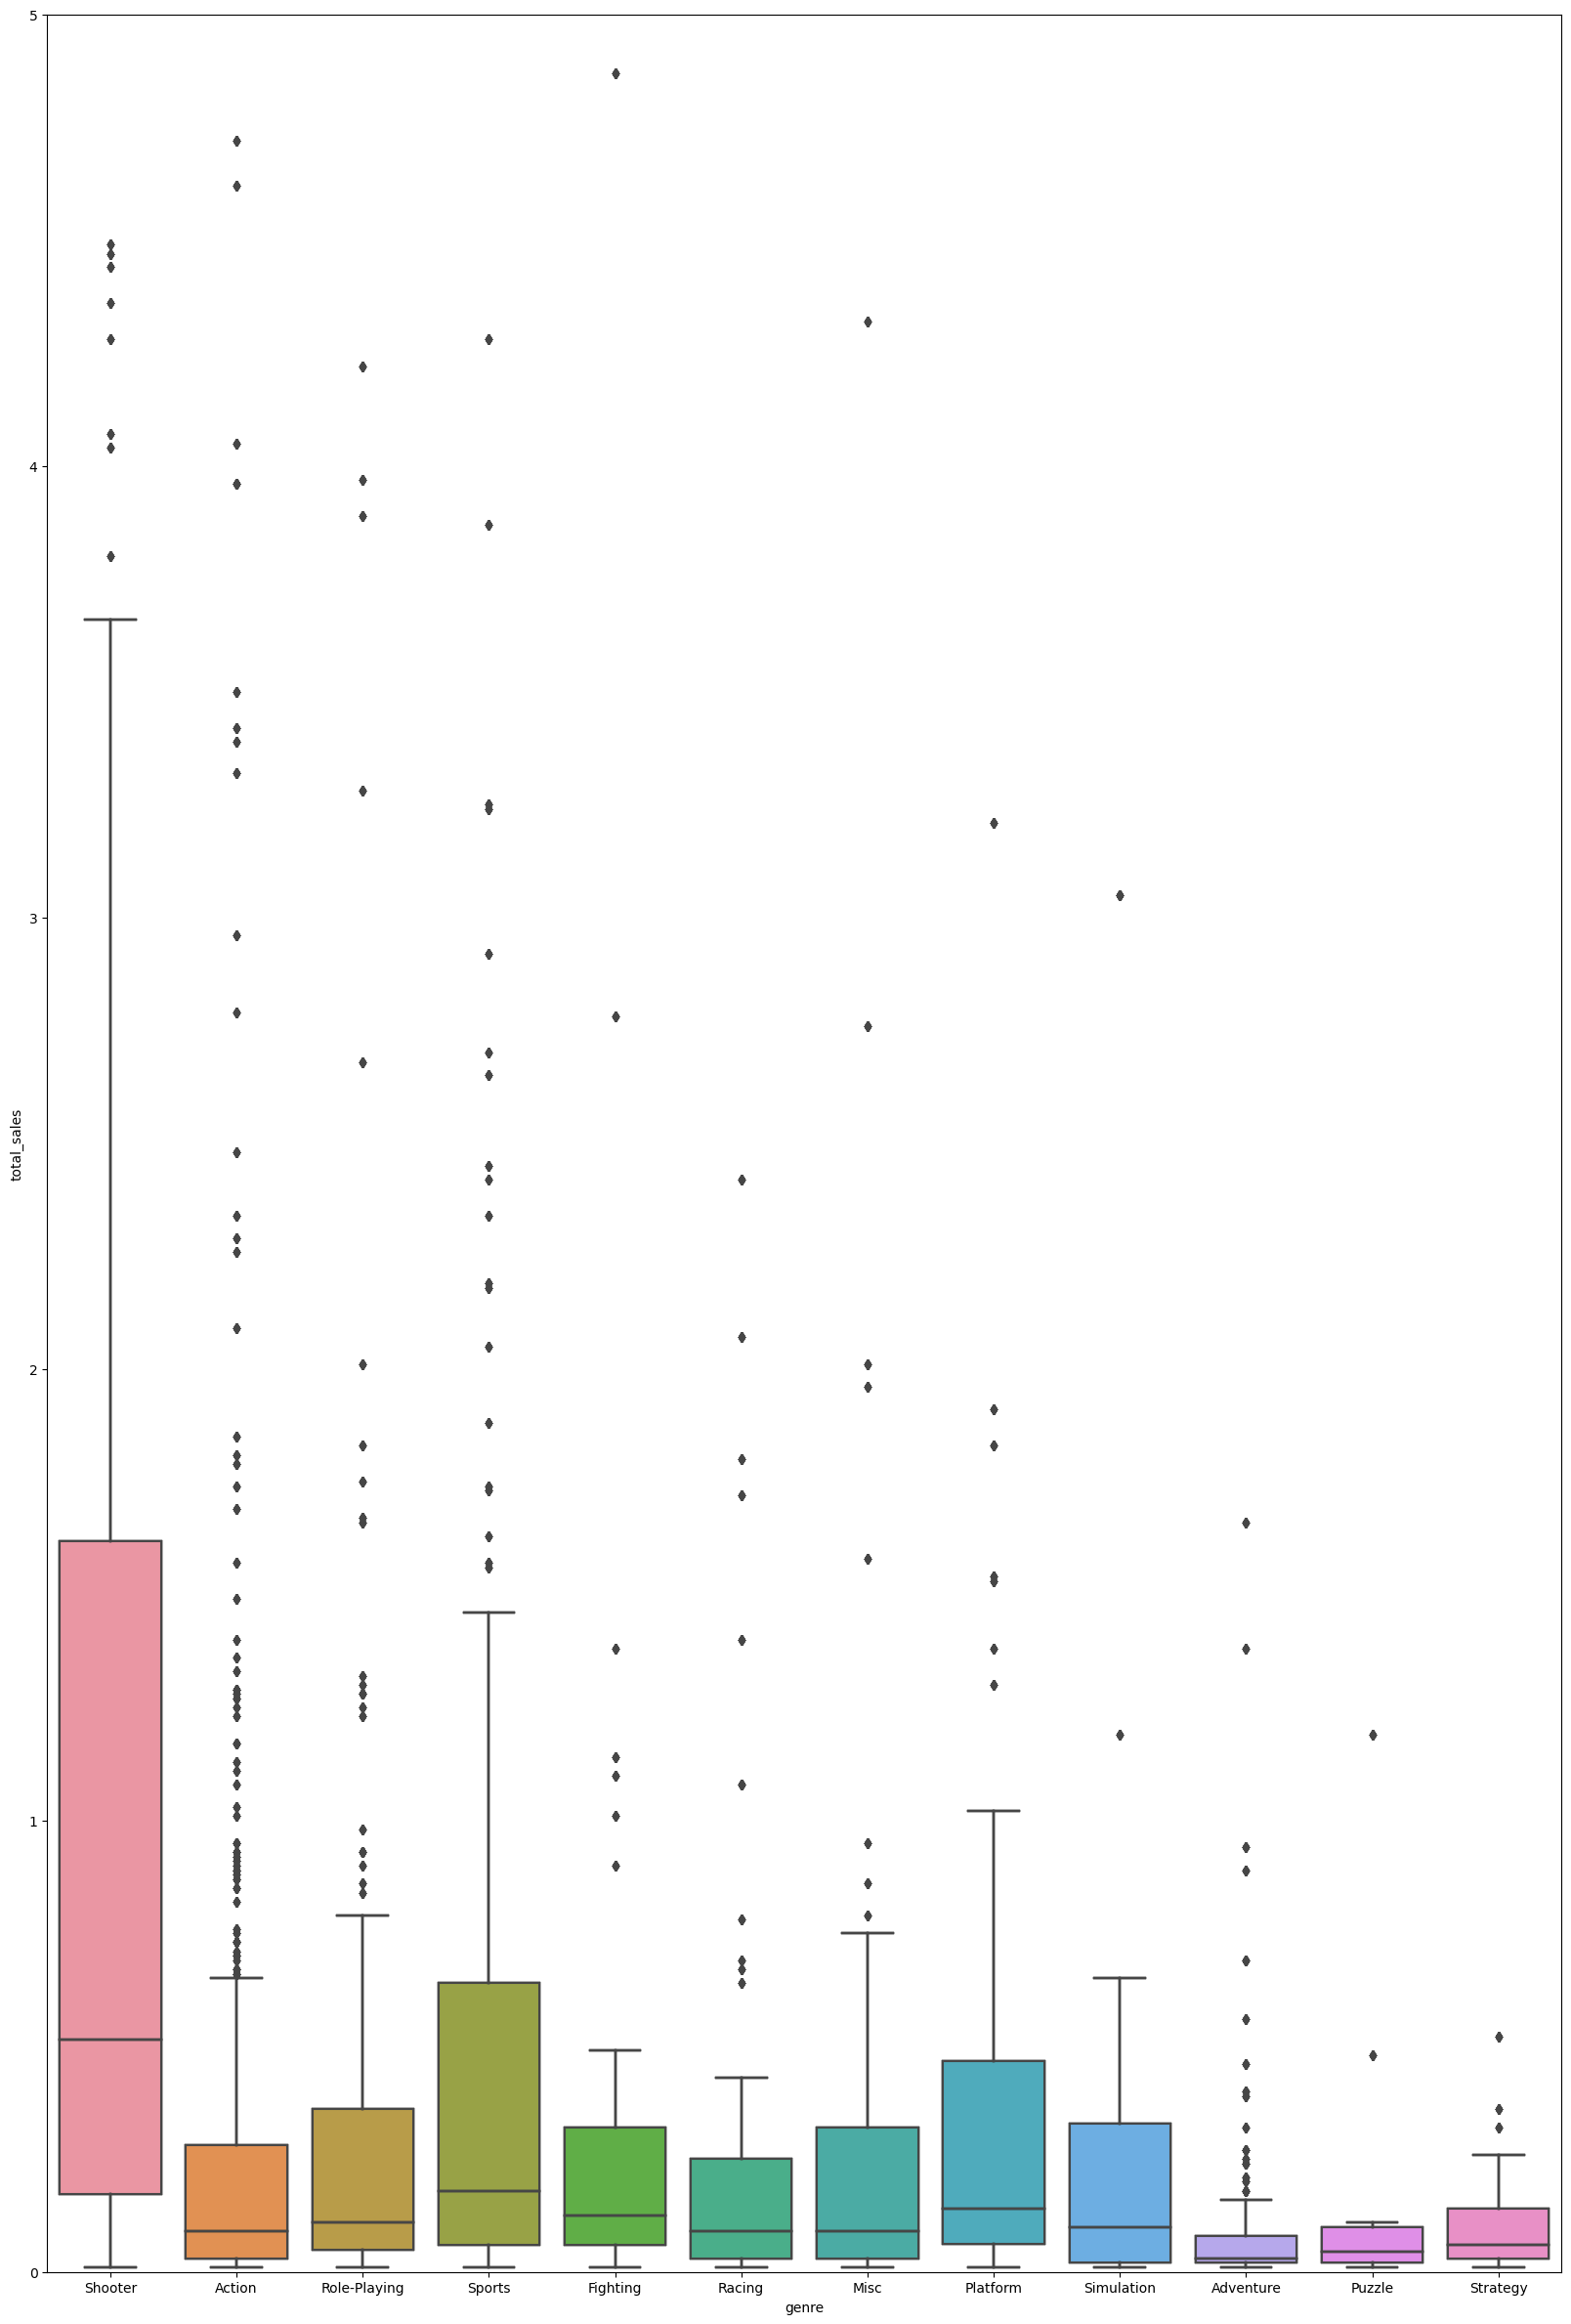

In [40]:
# изучаем распределение продаж по жанрам с помощью диаграммы размаха

for x in actual_period_df:
    sbn.boxplot()
    x = top_platforms_df['genre']
    y = top_platforms_df['total_sales']
    ax = sbn.boxplot(x, y, data=top_platforms_df)
    ax.set_ylim([0,5])
    plt.rcParams['figure.figsize']=(30, 30)
plt.show()

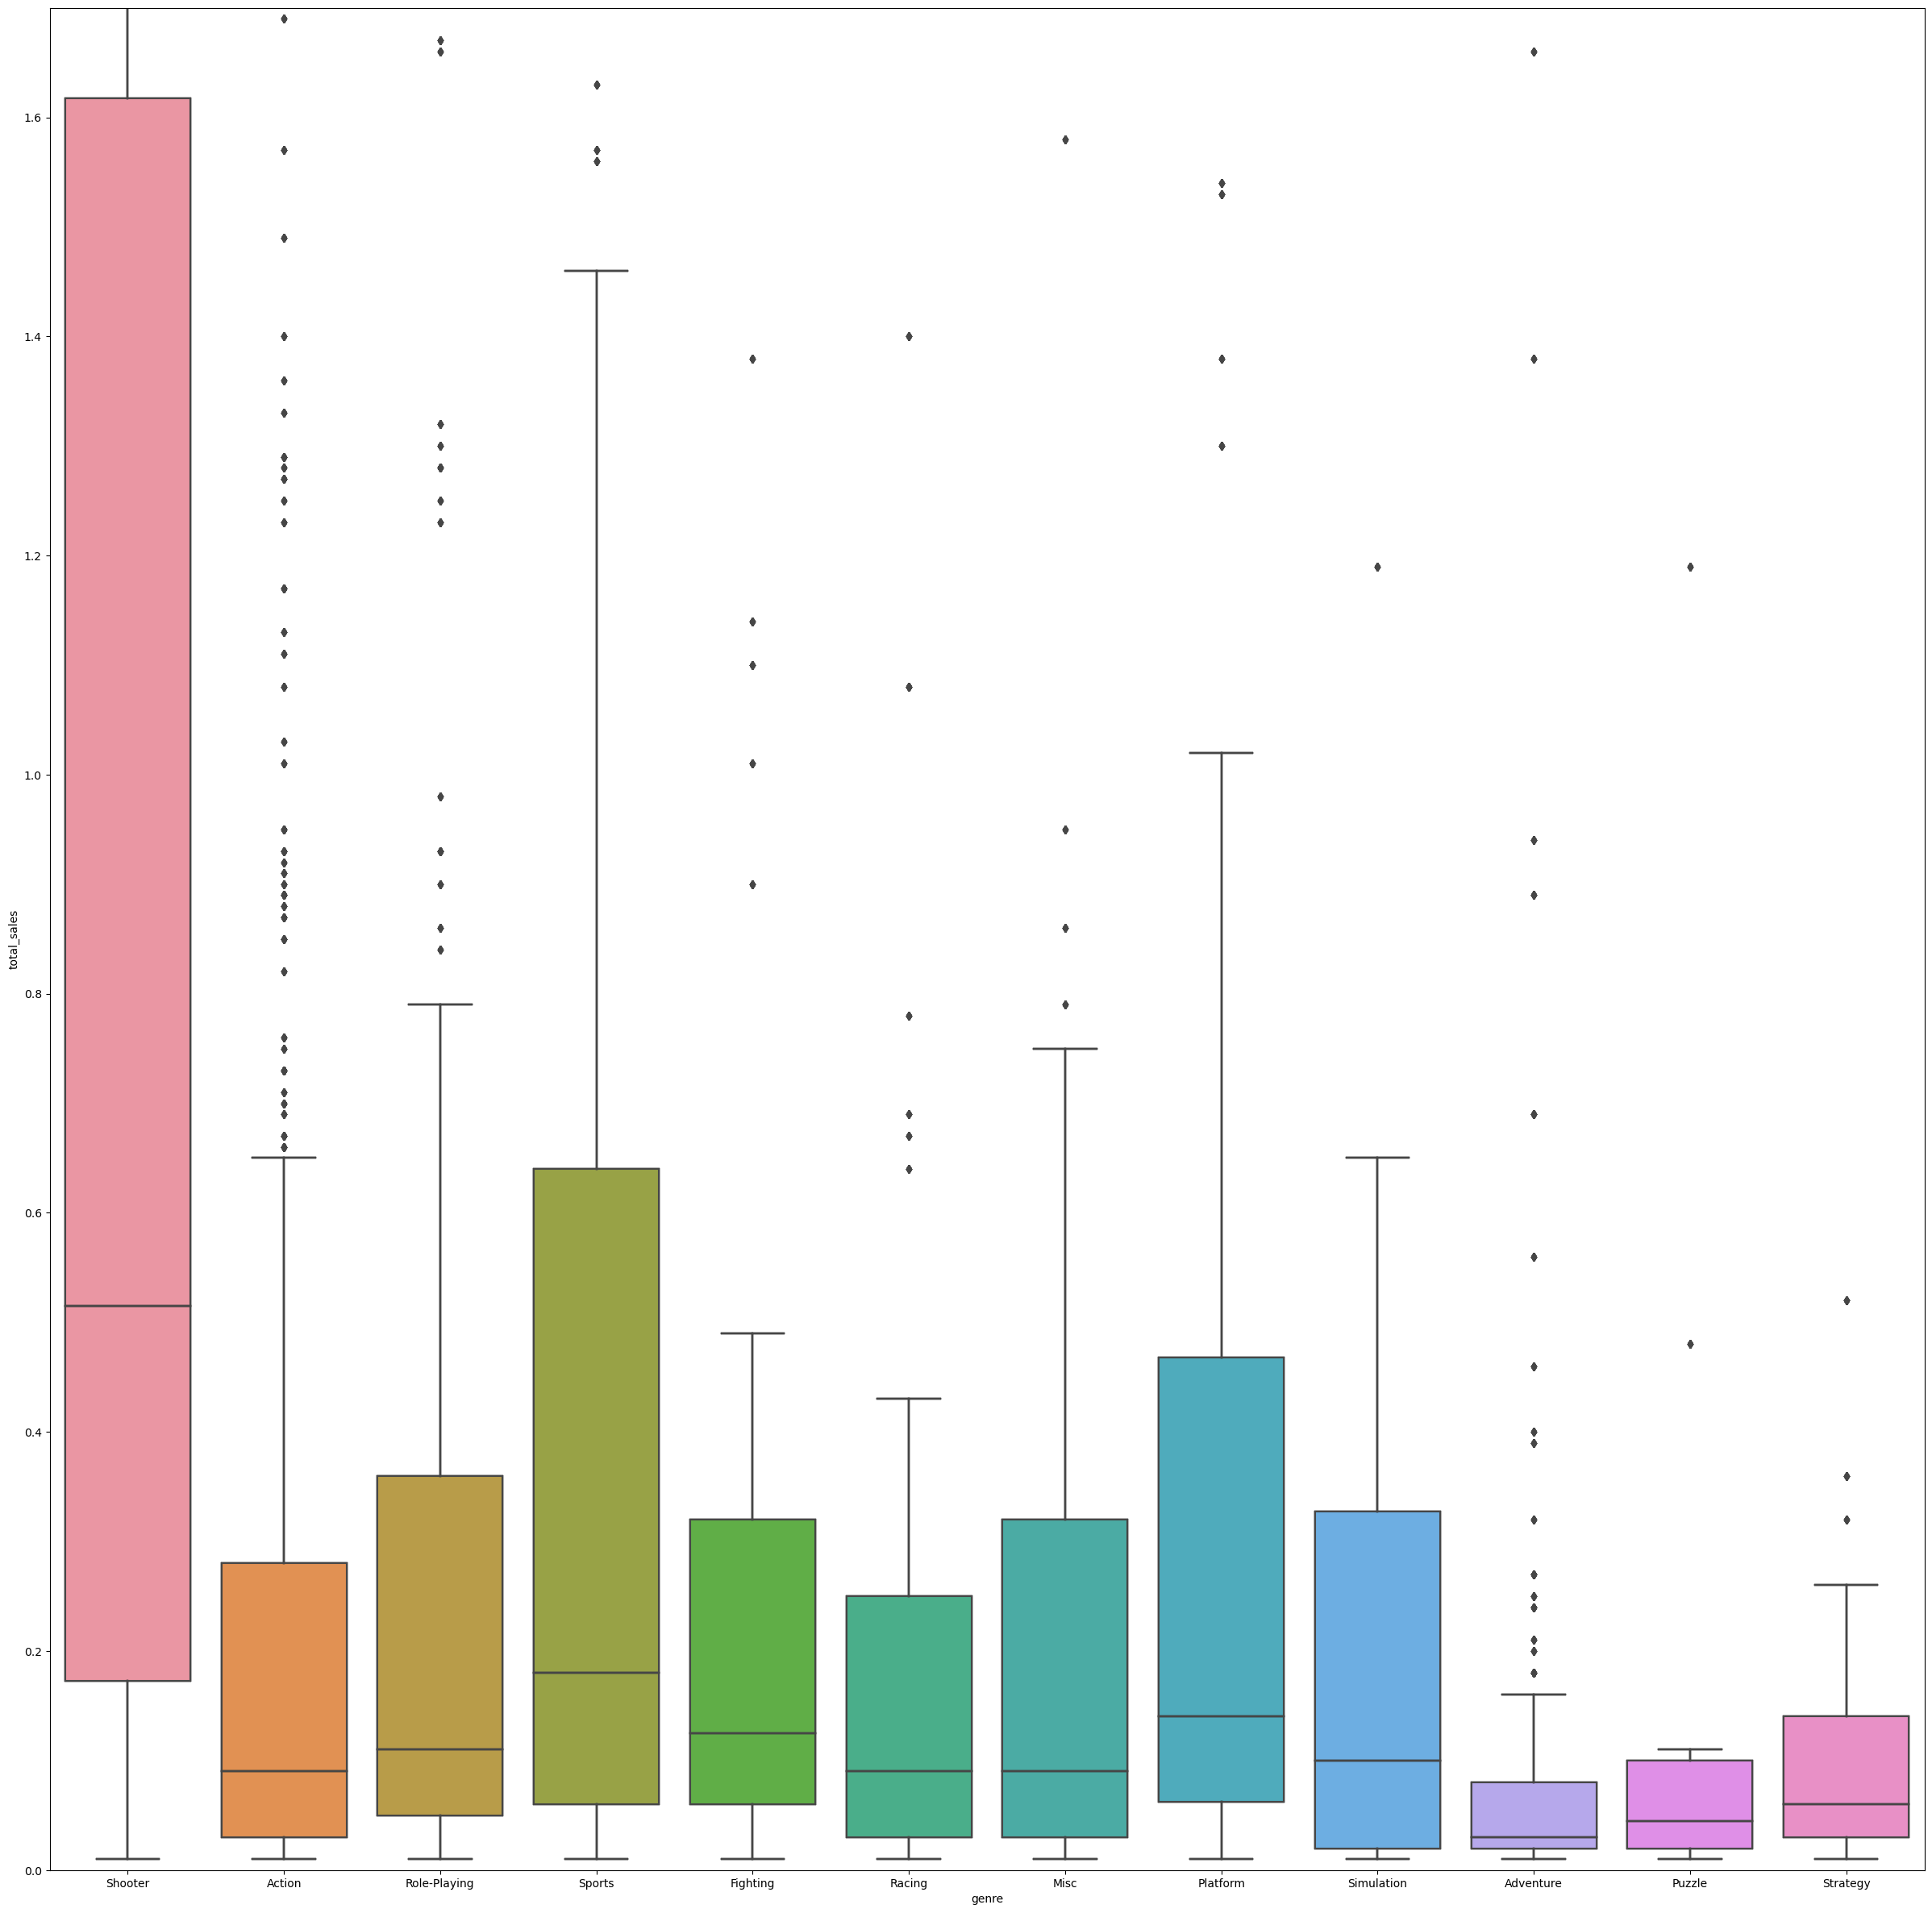

In [41]:
# строим боксплоты еще раз в другом масштабе

for x in actual_period_df:
    sbn.boxplot()
    x = top_platforms_df['genre']
    y = top_platforms_df['total_sales']
    ax = sbn.boxplot(x, y, data=top_platforms_df)
    ax.set_ylim([0,1.7])
    plt.rcParams['figure.figsize']=(30, 30)
plt.show()

Самые продаваемые жанры: Шутер, Спрот и Платформенный. Они имеют наибольшие медианы и области нормальных значений. Стоит отметить жанр Экшн за большое количество успешных игр за пределами нормальной области при относительно малой медиане. У РПГ, Файтинга, Гонок, Музыки и Симуляторов медианные значения схожи и значительно меньше первой тройки. Наименее продаваемые: Приключение, Головоломка и Стратегия.

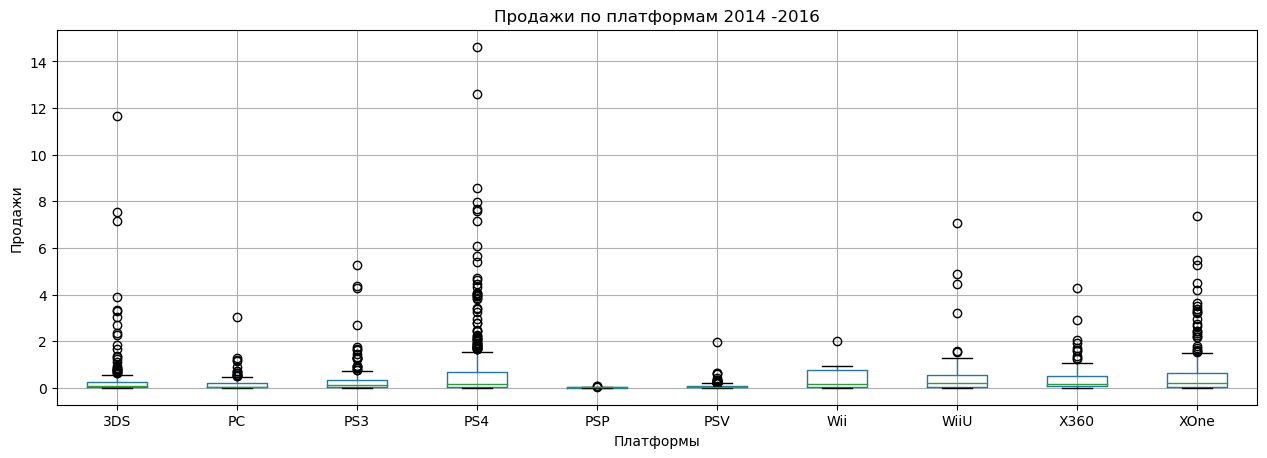

In [42]:
# изучаем распределение продаж по платформам с помощью диаграммы размаха

actual_period_df.boxplot('total_sales', by='platform',figsize=(15,5))
plt.xlabel('Платформы')
plt.ylabel('Продажи')

plt.suptitle('')
plt.title('Продажи по платформам 2014 -2016')

plt.show()

4 Портрет пользователя каждого региона

In [43]:
# находим топ-5 платформ по популярности для каждого региона
# для Северной Америки

actual_period_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [44]:
# для Европы

actual_period_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [45]:
# для Японии

actual_period_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [46]:
# строим графики для ТОП-5 платформ по регионам


def graph_1 (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

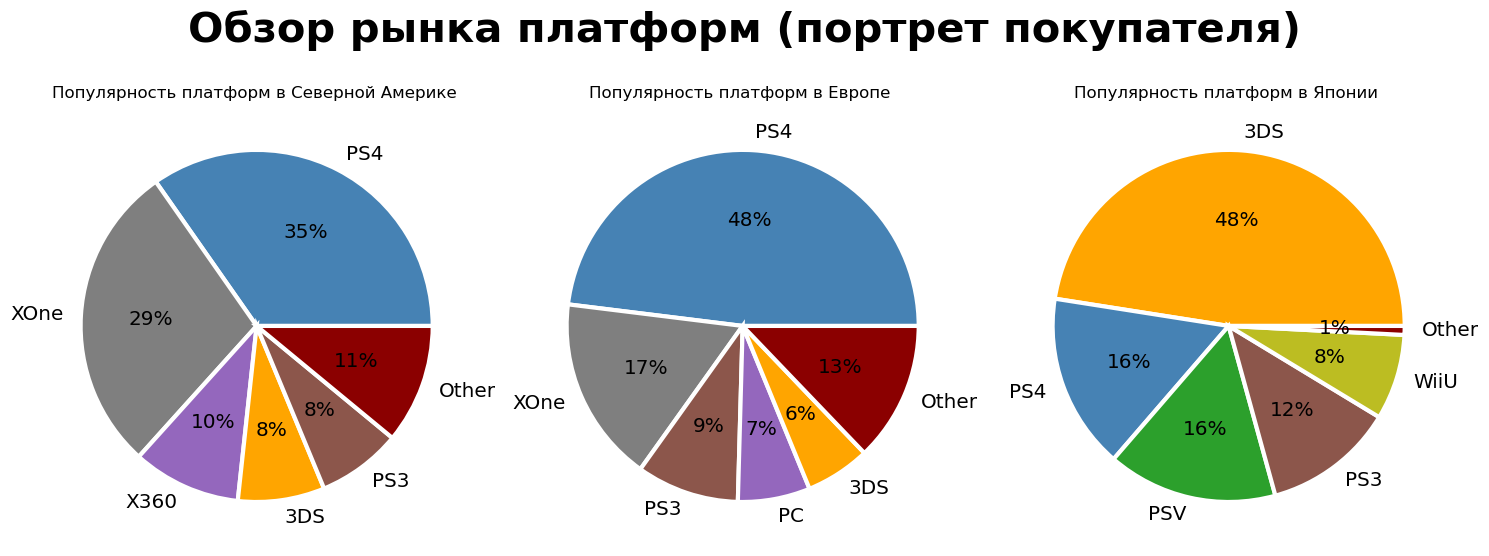

In [47]:
# круги в ряд

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2014

graph_1(actual_period_df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph_1(actual_period_df, x_year,'eu_sales', 'Европе', axes[1])
graph_1(actual_period_df, x_year, 'jp_sales', 'Японии', axes[2])

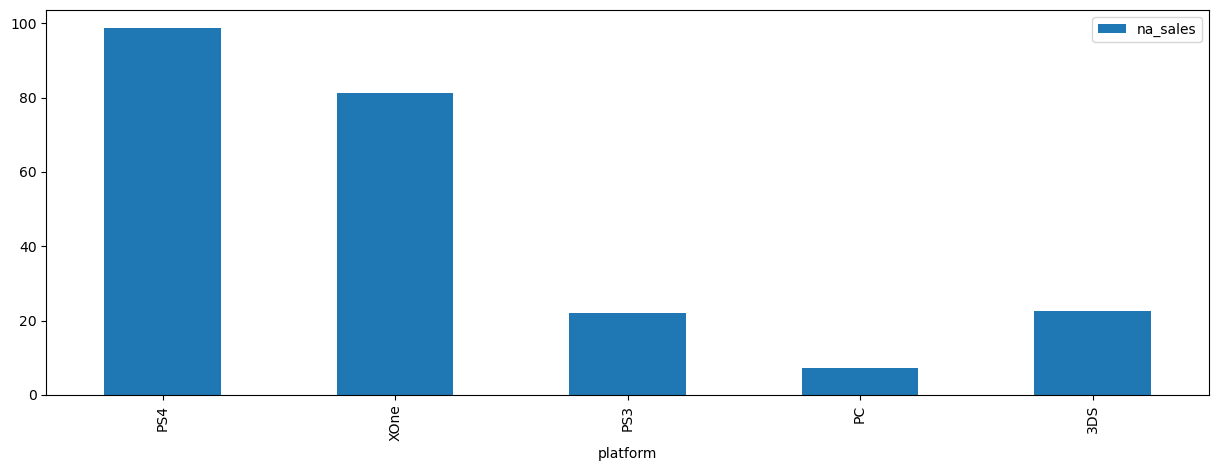

In [48]:
# check
(actual_period_df.groupby('platform').sum('na_sales').sort_values(
by='eu_sales', ascending=False).head(5)['na_sales']).to_frame().plot(kind = 'bar', figsize=(15, 5));

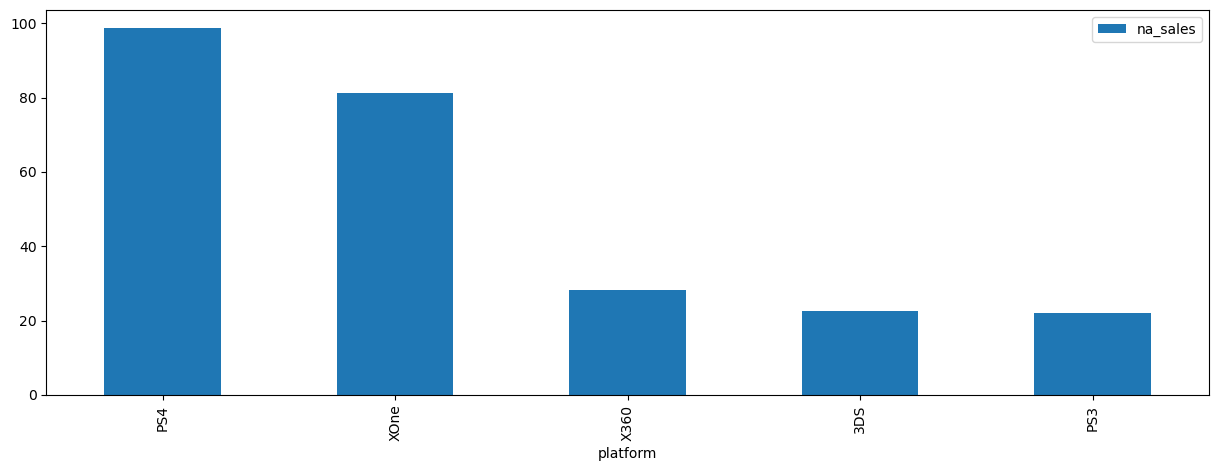

In [49]:
# check
(actual_period_df.groupby('platform').sum('na_sales').sort_values(
by='na_sales', ascending=False).head(5)['na_sales']).to_frame().plot(kind = 'bar', figsize=(15, 5));

Если первая пятерка консолей в Северной Америке и Европе схожа, то от Японской существенно отличается. Западные ТОП-5 открывают PS4 и Xbox One, а 3DS попадает в категорию Other, в Японской 3DS лидирует, PS4 на втором месте, а Xbox One в "остальных".

In [50]:
# находим топ-5 жанров по популярности для каждого региона
# для Северной Америки

actual_period_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
by='na_sales', ascending=False).head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [51]:
# для Европы

actual_period_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [52]:
# для Японии

actual_period_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [53]:
# строим графики для ТОП-5 жанров по регионам

def graph_2 (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
      
    labels_c=sales.genre
    
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

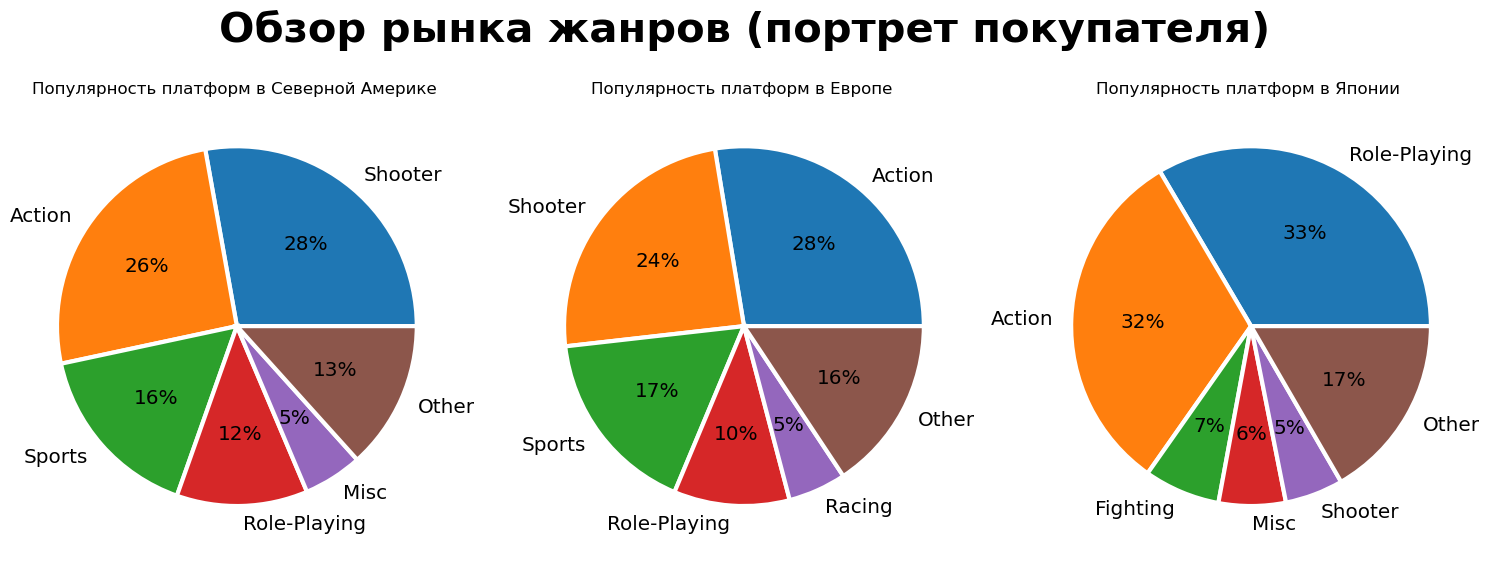

In [54]:
# круги в ряд

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2014

graph_2(actual_period_df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph_2(actual_period_df, x_year,'eu_sales', 'Европе', axes[1])
graph_2(actual_period_df, x_year, 'jp_sales', 'Японии', axes[2])

Для Японии ситуация снова отличается от Северной Америки и Европы. Если в первой РПГ лидирует, у Шутера 12 процентов, а Спорт попал в "остальные", то в западных регионах Экшн, Шутер и Спорт это первая тройка, а у РПГ меньше 10-ти процентов. Экшн в первой двойке во всех регионах.

In [55]:
# проверяем, как влияет рейтинг ESRB на продажи в каждом регионе
# для Северной Америки

actual_period_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
not defined,64.72
E,50.74
T,38.95
E10+,33.23


In [56]:
# для Европы

actual_period_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
by='eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
not defined,58.95
E,58.06
T,34.07
E10+,26.16


In [57]:
# для Японии

actual_period_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
by='jp_sales', ascending=False)

,jp_sales
rating,
not defined,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


В западных регионах лучше всего продаются игры для совершеннолетних. Игры для всех возрастов и для тинейджеров - второе и третье место. Не имеющие рейтинга игры составляют незначительную долю рынка во всех регионах. В Японии на первом месте игры для тинейджеров, на втором для всех возрастов, для взрослых - только на третьем. Как и в ранее описаных случаях, японский рынок существенно отличается от западного.

5 Проверяем гипотезы

In [58]:
# нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC равны
# альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC не равны

actual_period_df = actual_period_df.loc[actual_period_df['user_score'].notna()]

results_1 = st.ttest_ind(
    actual_period_df.loc[actual_period_df['platform'] == 'XOne']['user_score'], 
    actual_period_df.loc[actual_period_df['platform'] == 'PC']['user_score'])

# задаём значение уровня значимости
alpha = 0.05

# выводим p-value на экран
print(results_1.pvalue)

# условный оператор с выводом строки с ответом
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя оценки игроков на двух платформах и неодинаковы, с вероятностью 10.4%  такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей двух платформ.

In [59]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, с вероятностью в почти 19% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.

In [60]:
# нулевая гипотеза: Средние пользовательские рейтинги жанров Экшн и Спорт равны
# альтернативная гипотеза: Средние пользовательские рейтинги жанров Экшн и Спорт не равны

results_2 = st.ttest_ind(
    actual_period_df.loc[actual_period_df['genre'] == 'Action']['user_score'], 
    actual_period_df.loc[actual_period_df['genre'] == 'Sports']['user_score'])

# задаём значение уровня значимости
alpha = 0.05

# выводим p-value на экран
print(results_2.pvalue)

# условный оператор с выводом строки с ответом
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.8711147985105864e-19
Отвергаем нулевую гипотезу


Поскольку требовалось проверить гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные", а для нас она альтернативная, отвергая нулевую гипотезу, мы делаем вывод, что альтернативную опровергнуть не удалось.

6 Общий вывод

Рынок компьютерных игр приобрел масштаб, сопоставимый с нынешним, после середины 90-х (Более 200 релизов в год). Данные показывают, что жизненный цикл консолей длится около семи лет, после чего популярность набирают новые. К 2016-му году заметно общее снижение продаж для этого рынка. 

Наиболее значимые для исследования консоли: PS4, Xbox one и 3DS. Наиболее важный период: после 2013-го года. На глобальные продажи игр для PS4 и Xbox one влияют отзывы критиков, оценки пользователей для них не важны. Для продаж ПК игр не важны и оценки критиков. По глобальным продажам лидирует жанры Шутер и Экшн.

Типичный пользователь из Северной Америрки и Европы совершеннолетний, играет в PS 4, его любимые жанры: экшн и шутер и спорт.
Возростная категория типичного пользователя из Японии - тинейджер, играет он в 3DS, любимые жанры: РПГ, Экшн и Шутер.

Гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC равны, отвергнуть не получилось.
Не получилось также отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Экшн и Спорт разные.